In [1]:
# State the parameters of the pipeline

disk = '/mnt/pre_epi_seizures/'
baseline_files = 'h5_files/processing_datasets/baseline_datasets_new'
seizure_files = 'h5_files/processing_datasets/seizure_datasets_new'


# Exploratory Data Analysis
from classification.load_for_class import *
import convertpandas as cv_pd
import pandas as pd
import sklearn.preprocessing as pp
from sklearn.kernel_approximation import RBFSampler
from interim_processing import *
import iopes

# Set parameters of analyssis
feature_slot = 'hrv_time_features'

# Chose hyper-parameters of acquisition (ix of saved files)
hyper_param = 0


patient_list = [3]
lead_list = ['ECG-']
scaler = pp.StandardScaler()
rbf_feature = RBFSampler(gamma=1, random_state=1)
interim_processing = [scaler]
hist_bins = None
dist = None
flag_hist = True
flag_andrews = True
flag_series = True
flag_box = True
flag_pair = True
assign_baseline = 'assign_equal_baseline_seizure'
label_struct = {
                        'inter_ictal':{
                            'label': 'Inter-Ictal Data Points',
                            'color': 'blue',
                            'intervals_samples': [(1000 * 0 * 60, 1000 * 0 * 60 )]
                                     },
                        'pre_ictal':{
                            'label': 'Pre-Ictal data points',
                            'color': 'yellow',
                            'intervals_samples': [(1000 * 20 * 60, 1000 * 49 * 60 )]
                                     },
                        'ictal':{
                            'label': 'Ictal data points',
                            'color': 'red',
                            'intervals_samples': [(1000 * 50 * 60, 1000 * 55 * 60 )]
                                 },
                        }
baseline_label_struct = {
                         'baseline':{
                            'label': 'Baseline Data Points',
                            'color': 'green',
                            'intervals_samples': [(0, 1000 * 120 * 60 )]
                                    },
                        }

/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
eda_dir = 'EDAnalysis/'

eda_id = iopes.get_eda_params_path(disk=disk,
                                    eda_dir=eda_dir,
                                    patient_list = patient_list,
                                    lead_list = lead_list,
                                    scaler = scaler,
                                    interim_processing = interim_processing,
                                    hist_bins = hist_bins,
                                    dist = dist,
                                    flag_hist = flag_hist,
                                    flag_andrews = flag_andrews,
                                    flag_series = flag_series,
                                    flag_box = flag_box,
                                    assign_baseline = assign_baseline,
                                    label_struct = label_struct,
                                    baseline_label_struct = baseline_label_struct)
path = disk + eda_dir + eda_id + '/'

('flag_box', True)('flag_series', True)('dist', None)('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))('lead_list', ['ECG-'])('interim_processing', [StandardScaler(copy=True, with_mean=True, with_std=True)])('flag_hist', True)('assign_baseline', 'assign_equal_baseline_seizure')('label_struct', {'pre_ictal': {'color': 'yellow', 'intervals_samples': [(1200000, 2940000)], 'label': 'Pre-Ictal data points'}, 'inter_ictal': {'color': 'blue', 'intervals_samples': [(0, 0)], 'label': 'Inter-Ictal Data Points'}, 'ictal': {'color': 'red', 'intervals_samples': [(3000000, 3300000)], 'label': 'Ictal data points'}})('baseline_label_struct', {'baseline': {'color': 'green', 'intervals_samples': [(0, 7200000)], 'label': 'Baseline Data Points'}})('flag_andrews', True)('patient_list', [3])('hist_bins', None)


In [3]:
if not os.path.exists(path):
    os.mkdir(path)

In [4]:
# Ingest Seizure Data
path_to_load = disk + seizure_files + '.h5'
path_to_map = disk + seizure_files + '_map.txt'

# Feature group to analyse -- point of entry
feature_name = get_feature_group_name_list(path_to_map,
                                               feature_slot)[hyper_param]

print feature_name


seizure_data = cv_pd.convert_to_pandas(path_to_load, path_to_map,
                        patient_list, feature_name,
                        lead_list, label_struct)
seizure_data

[2018-04-12 03:00:30.602415]:get_signal:20:Loading [signal: 3_FA7774DK_ECG-_2017-04-20 07:38:44.000000_0][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:120__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_]
[2018-04-12 03:00:30.603430]:get_signal:20:Loading [signal: 3_FA7774DR_ECG-_2017-04-20 16:09:45.000000_1][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwi

/3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:120__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_
closed
closed
closed
data
3
0
data
3
1
data
3
2


mean_NN     SD_NN    p_NN50    var_NN        LF        HF      LF_HF  \
0    1.051936  0.067105  120000.0  0.004503  0.291912  0.130535   2.236279   
1    1.052184  0.067851  120000.0  0.004604  0.304367  0.121847   2.497934   
2    1.039448  0.090097  120000.0  0.008117  0.350268  0.322294   1.086798   
3    1.020874  0.161599  120000.0  0.026114  0.666613  1.622045   0.410971   
4    0.972798  0.194223  120000.0  0.037723  0.700044  1.598842   0.437844   
5    0.959872  0.192479  120000.0  0.037048  0.749903  1.627128   0.460876   
6    0.957033  0.182278  120000.0  0.033225  1.123207  0.923052   1.216840   
7    0.961906  0.119495  120000.0  0.014279  0.414214  0.125720   3.294748   
8    1.006262  0.059205  120000.0  0.003505  0.168420  0.110544   1.523554   
9    1.014183  0.050185  120000.0  0.002519  0.116074  0.096100   1.207847   
10   1.020819  0.048208  120000.0  0.002324  0.119608  0.091427   1.308226   
11   1.019805  0.046396  120000.0  0.002153  0.110793  0.101260   1.094145   
12   1.023021  0.048232  120000.0  0.002326  0.116769  0.091128   1.281367   
13   1.027063  0.049378  120000.0  0.002438  0.117377  0.087526   1.341058   
14   1.017789  0.048439  120000.0  0.002346  0.077701  0.079857   0.972993   
15   1.024846  0.054631  120000.0  0.002985  0.120303  0.085638   1.404788   
16   1.020047  0.054280  120000.0  0.002946  0.098108  0.077190   1.271001   
17   1.019526  0.062115  120000.0  0.003858  0.228920  0.125947   1.817586   
18   1.046299  0.071296  120000.0  0.005083  0.256551  0.130400   1.967413   
19   1.056291  0.074345  120000.0  0.005527  0.223236  0.121184   1.842127   
20   1.085028  0.076716  120000.0  0.005885  0.325833  0.165439   1.969507   
21   1.097025  0.066639  120000.0  0.004441  0.238733  0.165093   1.446055   
22   1.087341  0.065733  120000.0  0.004321  0.173833  0.156787   1.108721   
23   1.085481  0.073841  120000.0  0.005452  0.245938  0.203861   1.206398   
24   1.096810  0.081581  120000.0  0.006656  0.221997  0.176805   1.255604   
25   1.097026  0.083497  120000.0  0.006972  0.276448  0.224331   1.232326   
26   1.094056  0.097353  120000.0  0.009478  0.315641  0.213879   1.475790   
27   1.098784  0.092650  120000.0  0.008584  0.241102  0.225060   1.071279   
28   1.095200  0.088249  120000.0  0.007788  0.263930  0.265506   0.994062   
29   1.085522  0.093832  120000.0  0.008804  0.421065  0.230860   1.823899   
..        ...       ...       ...       ...       ...       ...        ...   
110  0.838502  0.039478  120000.0  0.001559  0.074085  0.054394   1.362010   
111  0.831927  0.037459  120000.0  0.001403  0.031950  0.054021   0.591438   
112  0.830893  0.036295  120000.0  0.001317  0.038626  0.043529   0.887375   
113  0.825306  0.035457  120000.0  0.001257  0.048646  0.035734   1.361308   
114  0.832408  0.034848  120000.0  0.001214  0.049184  0.027872   1.764622   
115  0.827060  0.041553  120000.0  0.001727  0.063076  0.029955   2.105655   
116  0.811675  0.045170  120000.0  0.002040  0.041299  0.027212   1.517676   
117  0.802342  0.046484  120000.0  0.002161  0.057357  0.032418   1.769274   
118  0.786229  0.034832  120000.0  0.001213  0.069647  0.030208   2.305563   
119  0.783198  0.032578  120000.0  0.001061  0.066653  0.027408   2.431887   
120  0.776048  0.035633  120000.0  0.001270  0.071018  0.023749   2.990320   
121  0.764276  0.027787  120000.0  0.000772  0.031538  0.017922   1.759726   
122  0.763827  0.028185  120000.0  0.000794  0.024947  0.018852   1.323299   
123  0.771667  0.033209  120000.0  0.001103  0.014415  0.025136   0.573469   
124  0.781372  0.035174  120000.0  0.001237  0.050101  0.032264   1.552830   
125  0.797126  0.031066  120000.0  0.000965  0.043294  0.029432   1.470972   
126  0.795874  0.031552  120000.0  0.000996  0.051994  0.027841   1.867514   
127  0.798280  0.033906  120000.0  0.001150  0.060576  0.028343   2.137255   
128  0.807524  0.035525  120000.0  0.001262  0.053977  0.034842   1.549195   
129  0.818264  0.044717  120

In [5]:
# Ingest Baseline Data

# set Labeling structure
path_to_load = disk + baseline_files + '.h5'
path_to_map = disk + baseline_files + '_map.txt'

# Feature group to analyse -- point of entry
feature_name = get_feature_group_name_list(path_to_map,
                                               feature_slot)[0]

print feature_name

baseline_data = cv_pd.convert_to_pandas(path_to_load, path_to_map,
                        patient_list, feature_name,
                        lead_list, baseline_label_struct)

baseline_data

[2018-04-12 03:00:30.665169]:get_signal:20:Loading [signal: 3_FA7774DI_ECG-_2017-04-20 03:38:19.000000][group: /raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:120__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_]
[2018-04-12 03:00:30.666250]:get_signal:20:Loading [signal: 3_FA7774DJ_ECG-_2017-04-20 05:38:32.000000][group: /raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__fin

/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:120__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_
closed
closed
closed
data
3
0
data
3
0


mean_NN     SD_NN    p_NN50    var_NN        LF        HF     LF_HF  \
0    0.961516  0.070657  120000.0  0.004992  0.204625  0.211855  0.965875   
1    0.967918  0.043845  120000.0  0.001922  0.152258  0.043737  3.481176   
2    0.987343  0.060559  120000.0  0.003667  0.248194  0.082817  2.996881   
3    0.996038  0.063283  120000.0  0.004005  0.200812  0.127719  1.572295   
4    0.990559  0.064283  120000.0  0.004132  0.185957  0.139358  1.334385   
5    0.989042  0.067710  120000.0  0.004585  0.196982  0.172344  1.142955   
6    0.992608  0.118442  120000.0  0.014028  0.711912  0.661079  1.076894   
7    0.981983  0.115525  120000.0  0.013346  0.648247  0.626102  1.035369   
8    0.975397  0.118555  120000.0  0.014055  0.641229  0.614684  1.043184   
9    0.974091  0.118771  120000.0  0.014106  0.664930  0.594671  1.118147   
10   0.950381  0.051539  120000.0  0.002656  0.152792  0.065030  2.349576   
11   0.949473  0.053825  120000.0  0.002897  0.160915  0.064601  2.490920   
12   0.948125  0.051989  120000.0  0.002703  0.133761  0.069655  1.920328   
13   0.937030  0.070522  120000.0  0.004973  0.192641  0.192408  1.001212   
14   0.927167  0.066539  120000.0  0.004427  0.141656  0.176409  0.802993   
15   0.913418  0.059586  120000.0  0.003550  0.126586  0.177238  0.714217   
16   0.910313  0.074915  120000.0  0.005612  0.224269  0.218656  1.025671   
17   0.906494  0.055749  120000.0  0.003108  0.148444  0.114853  1.292467   
18   0.914065  0.064545  120000.0  0.004166  0.216709  0.118753  1.824870   
19   0.913282  0.065494  120000.0  0.004290  0.248985  0.115207  2.161191   
20   0.905175  0.177193  120000.0  0.031397  1.281119  1.640043  0.781150   
21   0.918592  0.179308  120000.0  0.032151  1.324832  1.650054  0.802902   
22   0.929221  0.179533  120000.0  0.032232  1.284608  1.656410  0.775538   
23   0.953443  0.187876  120000.0  0.035297  1.458616  1.716775  0.849626   
24   0.984579  0.068532  120000.0  0.004697  0.200771  0.111539  1.800009   
25   0.991070  0.063970  120000.0  0.004092  0.172454  0.119055  1.448516   
26   0.984502  0.064840  120000.0  0.004204  0.172080  0.110813  1.552891   
27   0.971998  0.040040  120000.0  0.001603  0.058824  0.061292  0.959721   
28   0.957746  0.031493  120000.0  0.000992  0.044845  0.046785  0.958543   
29   0.952351  0.027234  120000.0  0.000742  0.030374  0.035348  0.859277   
..        ...       ...       ...       ...       ...       ...       ...   
210  1.001228  0.047872  120000.0  0.002292  0.155935  0.089897  1.734594   
211  1.000904  0.053428  120000.0  0.002854  0.164338  0.086848  1.892247   
212  0.991743  0.056702  120000.0  0.003215  0.173155  0.093761  1.846764   
213  0.986247  0.055760  120000.0  0.003109  0.184221  0.076446  2.409813   
214  0.992927  0.057752  120000.0  0.003335  0.179556  0.079629  2.254916   
215  0.991236  0.054707  120000.0  0.002993  0.136921  0.081040  1.689544   
216  0.999260  0.057863  120000.0  0.003348  0.219430  0.094778  2.315204   
217  1.008366  0.057990  120000.0  0.003363  0.142387  0.112583  1.264722   
218  1.000041  0.057065  120000.0  0.003256  0.133460  0.114997  1.160552   
219  0.991899  0.061691  120000.0  0.003806  0.170655  0.116866  1.460268   
220  0.981226  0.055475  120000.0  0.003078  0.172934  0.088674  1.950232   
221  0.973982  0.049416  120000.0  0.002442  0.160010  0.078598  2.035805   
222  0.972547  0.044402  120000.0  0.001972  0.133377  0.067052  1.989164   
223  0.983262  0.042830  120000.0  0.001834  0.083496  0.088623  0.942148   
224  0.984466  0.039989  120000.0  0.001599  0.073230  0.095031  0.770585   
225  0.949068  0.085320  120000.0  0.007279  0.153052  0.102498  1.493225   
226  0.902821  0.112054  120000.0  0.012556  0.162111  0.122974  1.318250   
227  0.854145  0.248045  120000.0  0.061526  0.977333  1.775489  0.550458   
228  0.806708  0.240171  120000.0  0.057682  0.832145  1.724272  0.482606   
229  0.833940  0.245420  120000.0  0.060231  0.813202  1.758351  0.462480   
23

In [6]:
# Treat Baseline Data
baseline_data = baseline_data.dropna(axis=0, how='any').reset_index(drop=True)

baseline_data = globals()[assign_baseline](baseline_data,
                                          seizure_data,
                                         'seizure_nr',
                                         'patient_nr')

seizure_data = seizure_data.dropna(axis=0, how='any').reset_index(drop=True)

data = pd.concat([seizure_data, baseline_data],
                 ignore_index=True)
    

3
0
changing ix
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]
3
1
changing ix
[160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 2

In [7]:
# Add Seizure Type
cv_pd.add_seizure_types(data,
                        'patient_nr',
                        'seizure_nr',
                        'types_of_seizure',
                        'location')

/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


mean_NN     SD_NN    p_NN50    var_NN        LF        HF     LF_HF  \
0    1.080263  0.081672  120000.0  0.006670  0.317633  0.288304  1.101729   
1    1.051925  0.113292  120000.0  0.012835  0.407042  0.293746  1.385692   
2    1.022901  0.112720  120000.0  0.012706  0.339479  0.212169  1.600038   
3    0.997847  0.089328  120000.0  0.007980  0.263850  0.121434  2.172786   
4    0.980014  0.078237  120000.0  0.006121  0.262429  0.123185  2.130368   
5    1.010823  0.071429  120000.0  0.005102  0.261347  0.134934  1.936848   
6    1.018114  0.065112  120000.0  0.004240  0.216831  0.124197  1.745866   
7    1.020565  0.066278  120000.0  0.004393  0.216315  0.150868  1.433796   
8    1.017636  0.064389  120000.0  0.004146  0.188027  0.144667  1.299724   
9    1.001592  0.058485  120000.0  0.003420  0.177685  0.135714  1.309263   
10   1.010037  0.059617  120000.0  0.003554  0.161766  0.132409  1.221719   
11   1.009607  0.059125  120000.0  0.003496  0.184121  0.104623  1.759857   
12   1.011715  0.061322  120000.0  0.003760  0.182190  0.128325  1.419757   
13   1.016597  0.053295  120000.0  0.002840  0.097841  0.115704  0.845611   
14   1.013667  0.055299  120000.0  0.003058  0.095667  0.136414  0.701294   
15   1.039353  0.085904  120000.0  0.007379  0.240328  0.230184  1.044067   
16   1.054506  0.082649  120000.0  0.006831  0.236992  0.221614  1.069393   
17   1.067384  0.077323  120000.0  0.005979  0.290386  0.225455  1.287997   
18   1.075977  0.074923  120000.0  0.005613  0.256081  0.259034  0.988599   
19   1.066126  0.055786  120000.0  0.003112  0.087935  0.217353  0.404571   
20   1.060270  0.056914  120000.0  0.003239  0.101247  0.213910  0.473317   
21   1.051635  0.066462  120000.0  0.004417  0.168505  0.272376  0.618648   
22   1.043610  0.065648  120000.0  0.004310  0.225124  0.201229  1.118745   
23   1.035405  0.061834  120000.0  0.003823  0.190249  0.184398  1.031730   
24   1.048485  0.086579  120000.0  0.007496  0.432579  0.236623  1.828137   
25   1.054765  0.091336  120000.0  0.008342  0.528162  0.237953  2.219606   
26   1.046625  0.096647  120000.0  0.009341  0.511107  0.255117  2.003423   
27   1.048281  0.095887  120000.0  0.009194  0.401253  0.311470  1.288256   
28   1.043893  0.085346  120000.0  0.007284  0.218897  0.245547  0.891469   
29   1.054262  0.091343  120000.0  0.008344  0.262113  0.237080  1.105590   
..        ...       ...       ...       ...       ...       ...       ...   
654  1.001228  0.047872  120000.0  0.002292  0.155935  0.089897  1.734594   
655  1.000904  0.053428  120000.0  0.002854  0.164338  0.086848  1.892247   
656  0.991743  0.056702  120000.0  0.003215  0.173155  0.093761  1.846764   
657  0.986247  0.055760  120000.0  0.003109  0.184221  0.076446  2.409813   
658  0.992927  0.057752  120000.0  0.003335  0.179556  0.079629  2.254916   
659  0.991236  0.054707  120000.0  0.002993  0.136921  0.081040  1.689544   
660  0.999260  0.057863  120000.0  0.003348  0.219430  0.094778  2.315204   
661  1.008366  0.057990  120000.0  0.003363  0.142387  0.112583  1.264722   
662  1.000041  0.057065  120000.0  0.003256  0.133460  0.114997  1.160552   
663  0.991899  0.061691  120000.0  0.003806  0.170655  0.116866  1.460268   
664  0.981226  0.055475  120000.0  0.003078  0.172934  0.088674  1.950232   
665  0.973982  0.049416  120000.0  0.002442  0.160010  0.078598  2.035805   
666  0.972547  0.044402  120000.0  0.001972  0.133377  0.067052  1.989164   
667  0.983262  0.042830  120000.0  0.001834  0.083496  0.088623  0.942148   
668  0.984466  0.039989  120000.0  0.001599  0.073230  0.095031  0.770585   
669  0.949068  0.085320  120000.0  0.007279  0.153052  0.102498  1.493225   
670  0.902821  0.112054  120000.0  0.012556  0.162111  0.122974  1.318250   
671  0.854145  0.248045  120000.0  0.061526  0.977333  1.775489  0.550458   
672  0.806708  0.240171  120000.0  0.057682  0.832145  1.724272  0.482606   
673  0.833940  0.245420  120000.0  0.060231  0.813202  1.758351  0.462480   
67

In [8]:
# state the Data metafeatures
metafeatures = ['patient_nr', 'seizure_nr', 'time_sample', 'label', 'color', 'types_of_seizure', 'location']
features = [column
            for column in data.columns
            if column not in metafeatures]

# Drop missing values
data = data.dropna(axis=0, how='any').reset_index(drop=True)

In [9]:
# Interim process the data
for step in interim_processing:
    X = data[features]

    X_norm_np = step.fit_transform(X)

    #X_norm = pd.DataFrame(X_norm_np, columns=X.columns)

    data[features] = X_norm_np

In [10]:
# Modelation
import sklearn.svm as svm
from sklearn.model_selection import *
from sklearn.pipeline import *
import sklearn.naive_bayes as nb
from sklearn.feature_selection import *
from sklearn.neural_network import *
from sklearn.neighbors import *
from keras.utils import np_utils
from classification.keras_neural_nets import *

# Group the data
data_groups = data.groupby(['patient_nr',
                            'seizure_nr',
                            'types_of_seizure',
                            'location'])
group_id = 'seizure_nr'

label = 'label'

data_groups_list = list(data_groups)



# choose Pipeline **Details in pipelines.py 
pipe = Pipeline([('SVC', svm.SVC())])
#pipe = Pipeline([('GaussNB', nb.GaussianNB())])
#pipe = Pipeline([('KNN', KNeighborsClassifier())])
#pipe = Pipeline( [('ANN', KerasClassifier(build_fn=dense_network,
 #                                               input_dim = len(features),
 #                                               output_dim = len(y.unique()),
#                                                verbose=0))])

# choose parameter search method *coherent with Pipeline steps
param_grid = [
               {'SVC__C': [2**i for i in xrange(-5, 11)],
                'SVC__gamma':[2**i for i in xrange(-15, 1)]},
                 ]
#param_grid = [
               #{'GaussNB__priors': [None]},
                 # ]
#param_grid = [
#               {'KNN__n_neighbors': [n + 1 
 #                                     for n in xrange(0, 16, 2)]},
 #                 ]


# define cross-validation strategy 
cv_out = LeavePGroupsOut(n_groups=1)
cv_in = LeavePGroupsOut(n_groups=1)

# choose scoring
scoring = ['f1_macro', 'accuracy']

# choose wether to perform new computation
compute_all_new = True
plot_eda_all_new = True

search_function = GridSearchCV

hyper_param_heat = False
# Get path to save the results
#full_path = get_full_pipeline_name(path_to_save,
#                                   file_to_save,
#                                   pipe, 
#                                   scoring,
#                                   param_grid,
#                                   feature_names,
#                                   cv_out,
#                                   cv_in,
#                                   trial)



# plot_scatter(path_to_save, data_struct, class_metadata)

# plot_full(file_to_save, data_struct, class_metadata)

# Create directory to save results
#make_dir(full_path)


Using TensorFlow backend.


In [11]:
clf_id = iopes.get_eda_params_path(disk=disk,
                                   eda_dir=eda_dir + '/' + eda_id + '/' ,
                                   pipe = str(pipe),
                                   param_grid = param_grid,
                                   cv_out = cv_out,
                                   cv_in = cv_in,
                                   scoring = scoring,
                                   search_function = search_function,
                                   group_id=group_id,
                                   label=label)

path_to_save = disk + eda_dir + eda_id + '/' + clf_id

('search_function', <class 'sklearn.model_selection._search.GridSearchCV'>)('scoring', ['f1_macro', 'accuracy'])('cv_in', LeavePGroupsOut(n_groups=1))('label', 'label')('pipe', "Pipeline(memory=None,\n     steps=[('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\n  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',\n  max_iter=-1, probability=False, random_state=None, shrinking=True,\n  tol=0.001, verbose=False))])")('cv_out', LeavePGroupsOut(n_groups=1))('group_id', 'seizure_nr')('param_grid', [{'SVC__gamma': [3.0517578125e-05, 6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1], 'SVC__C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]}])


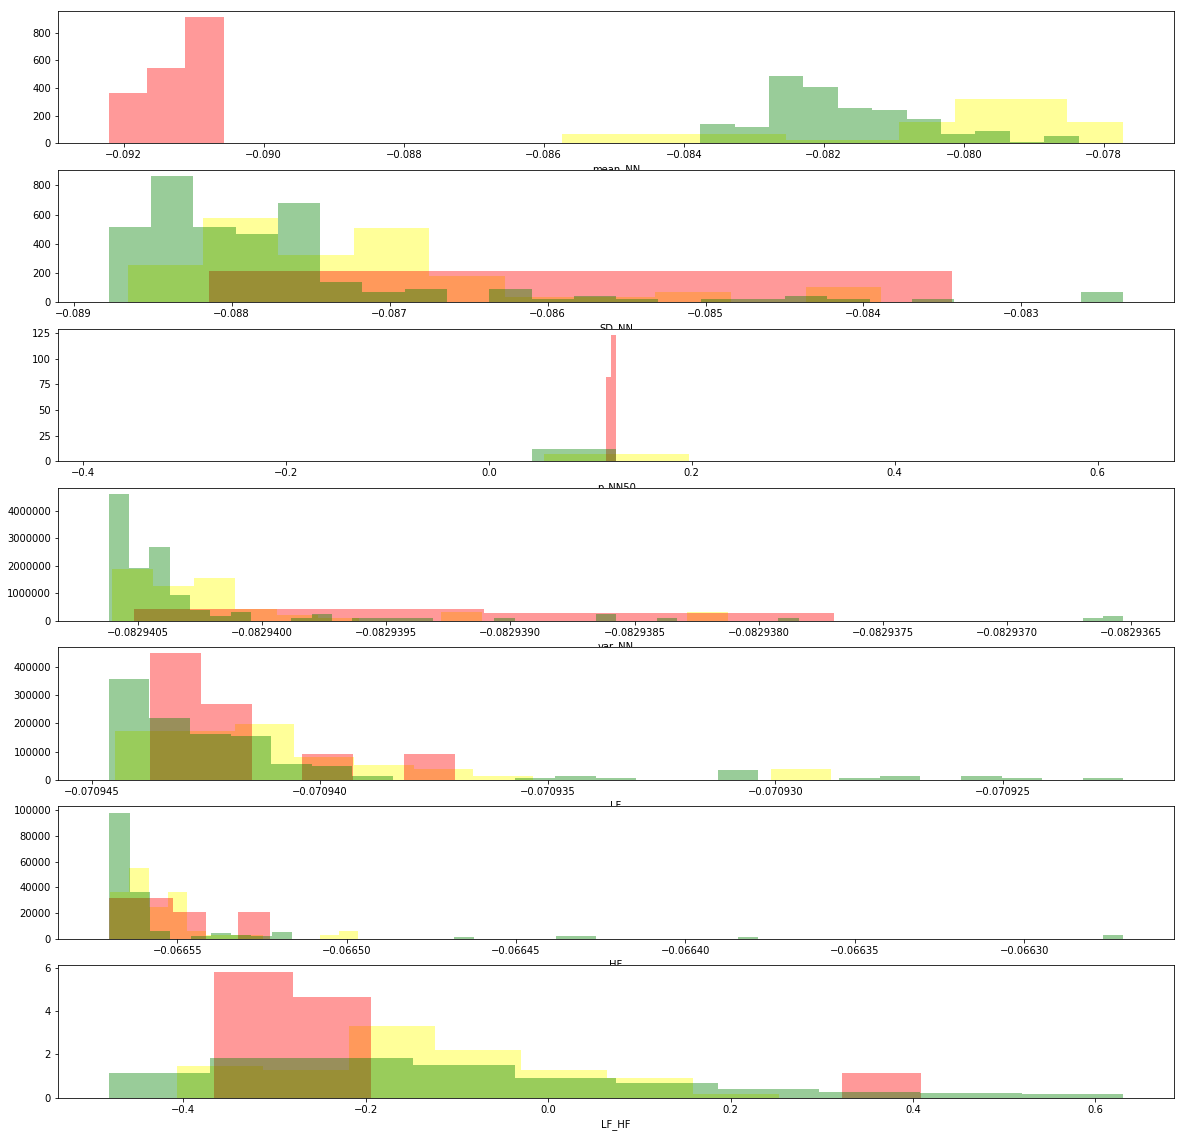

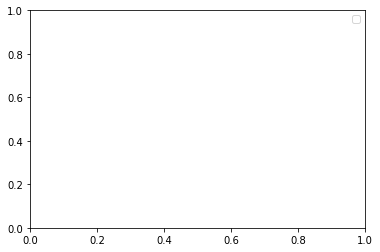

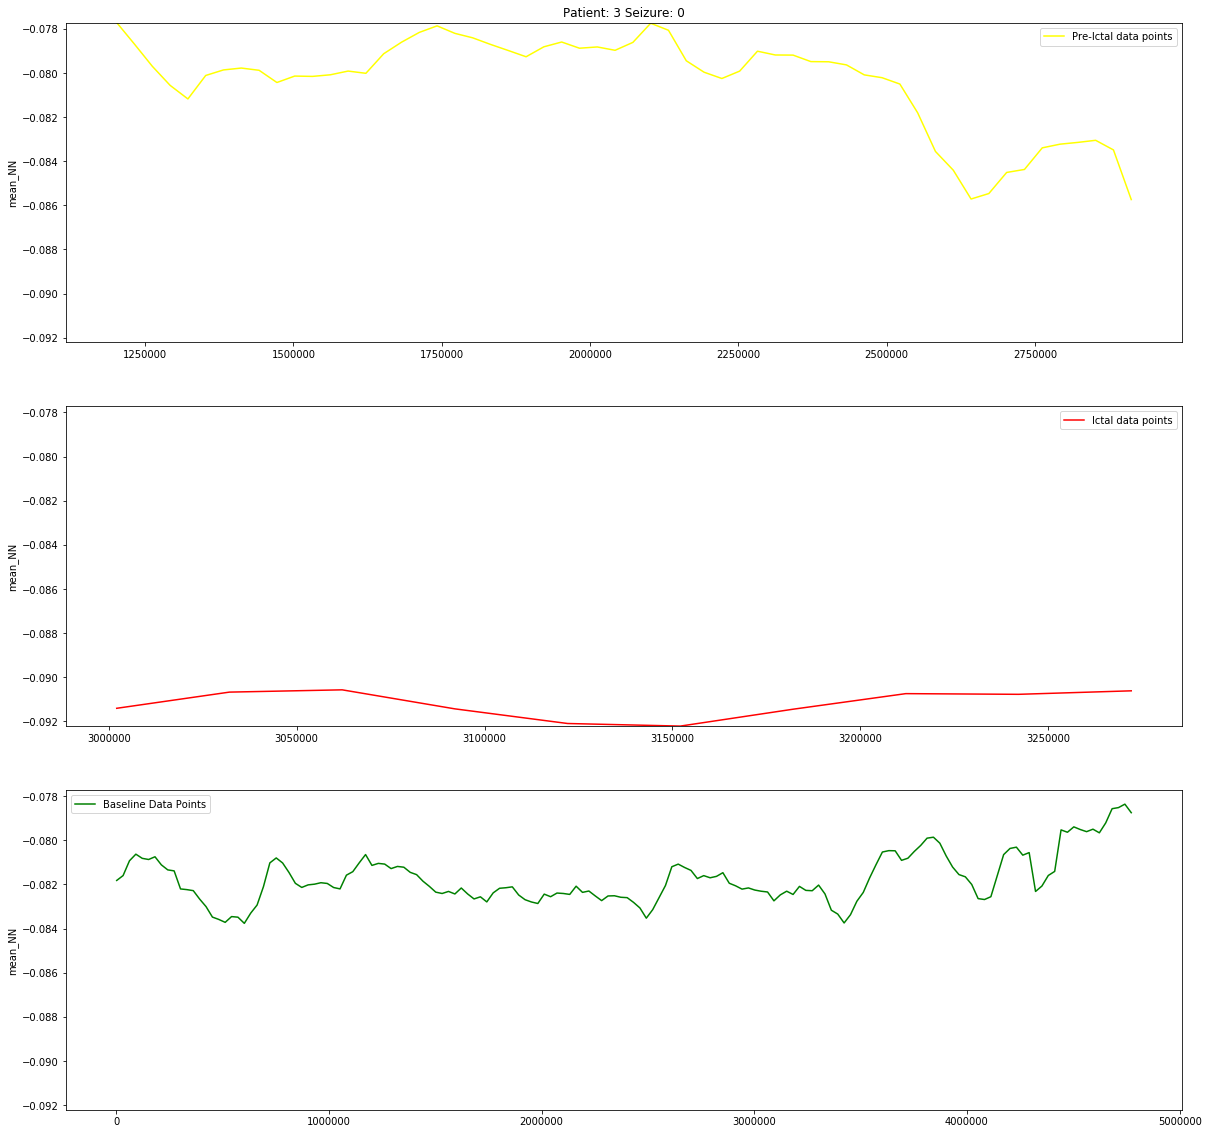

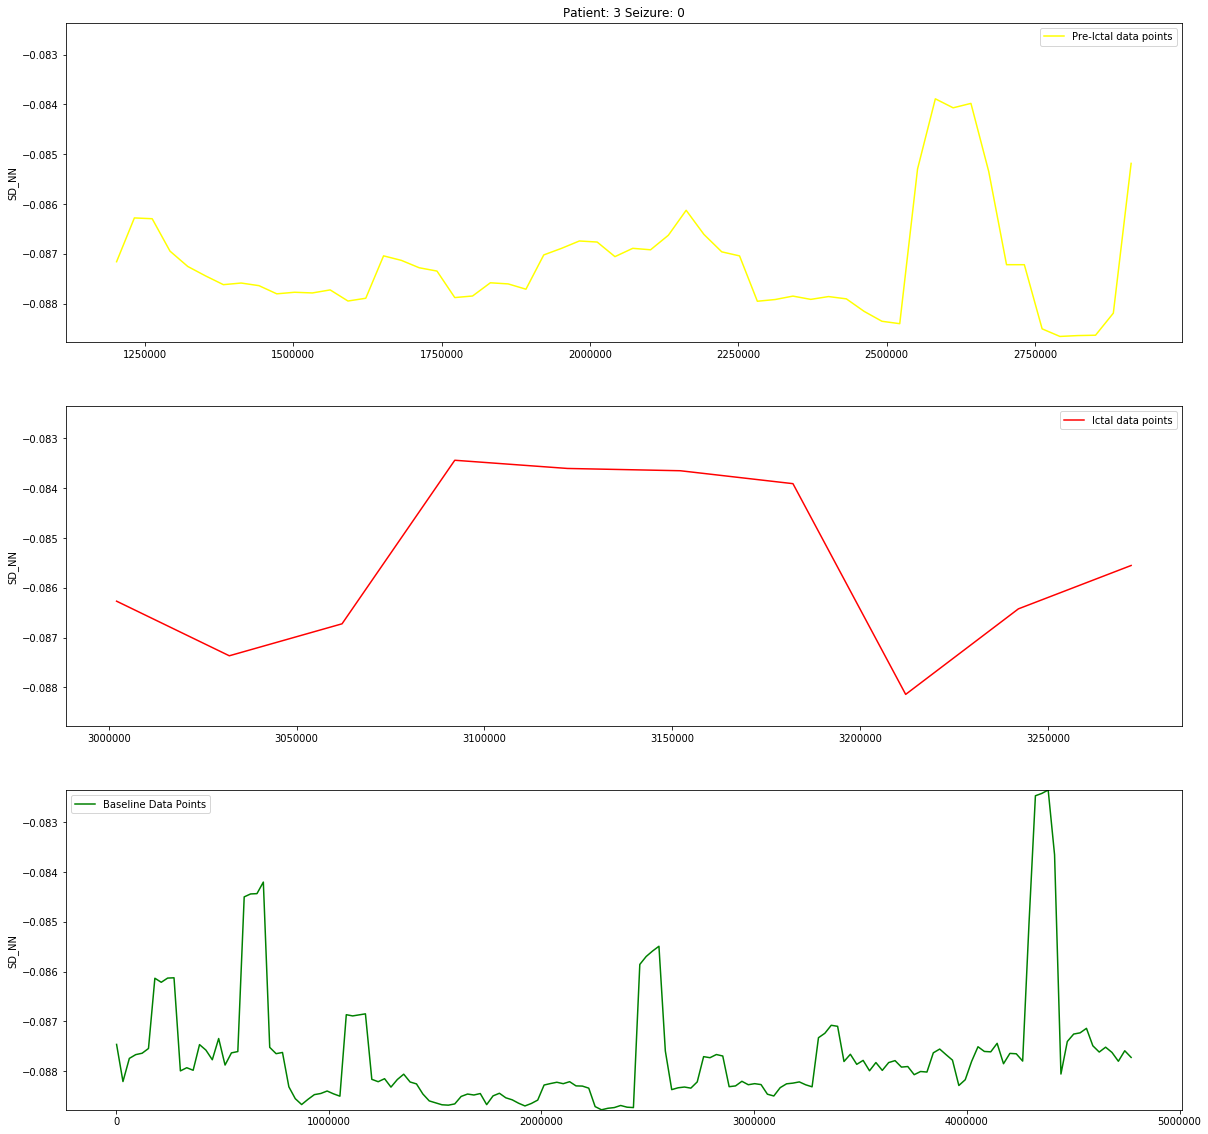

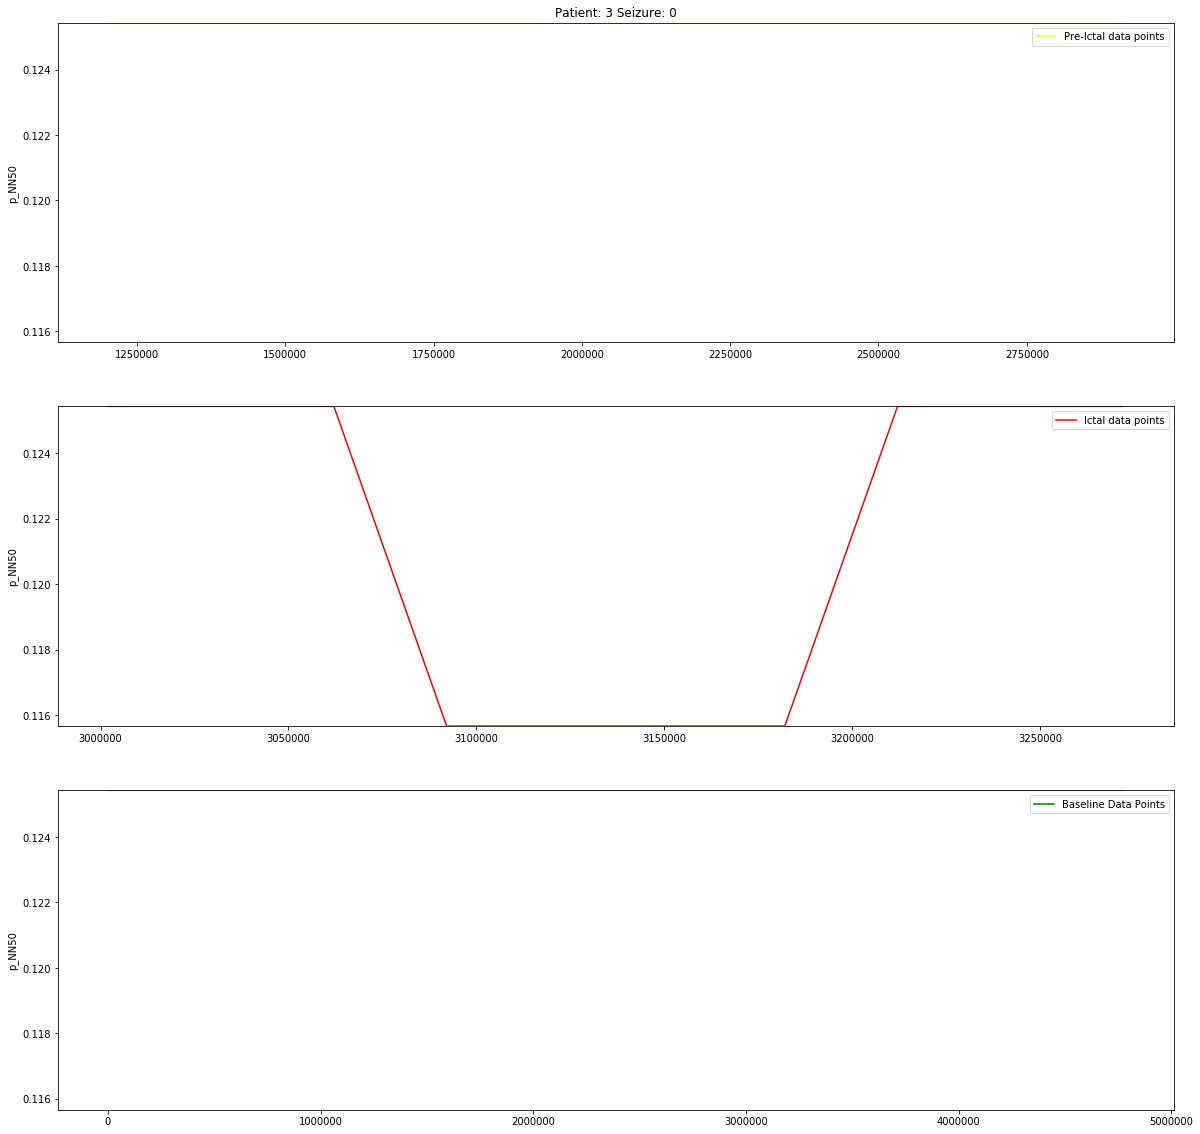

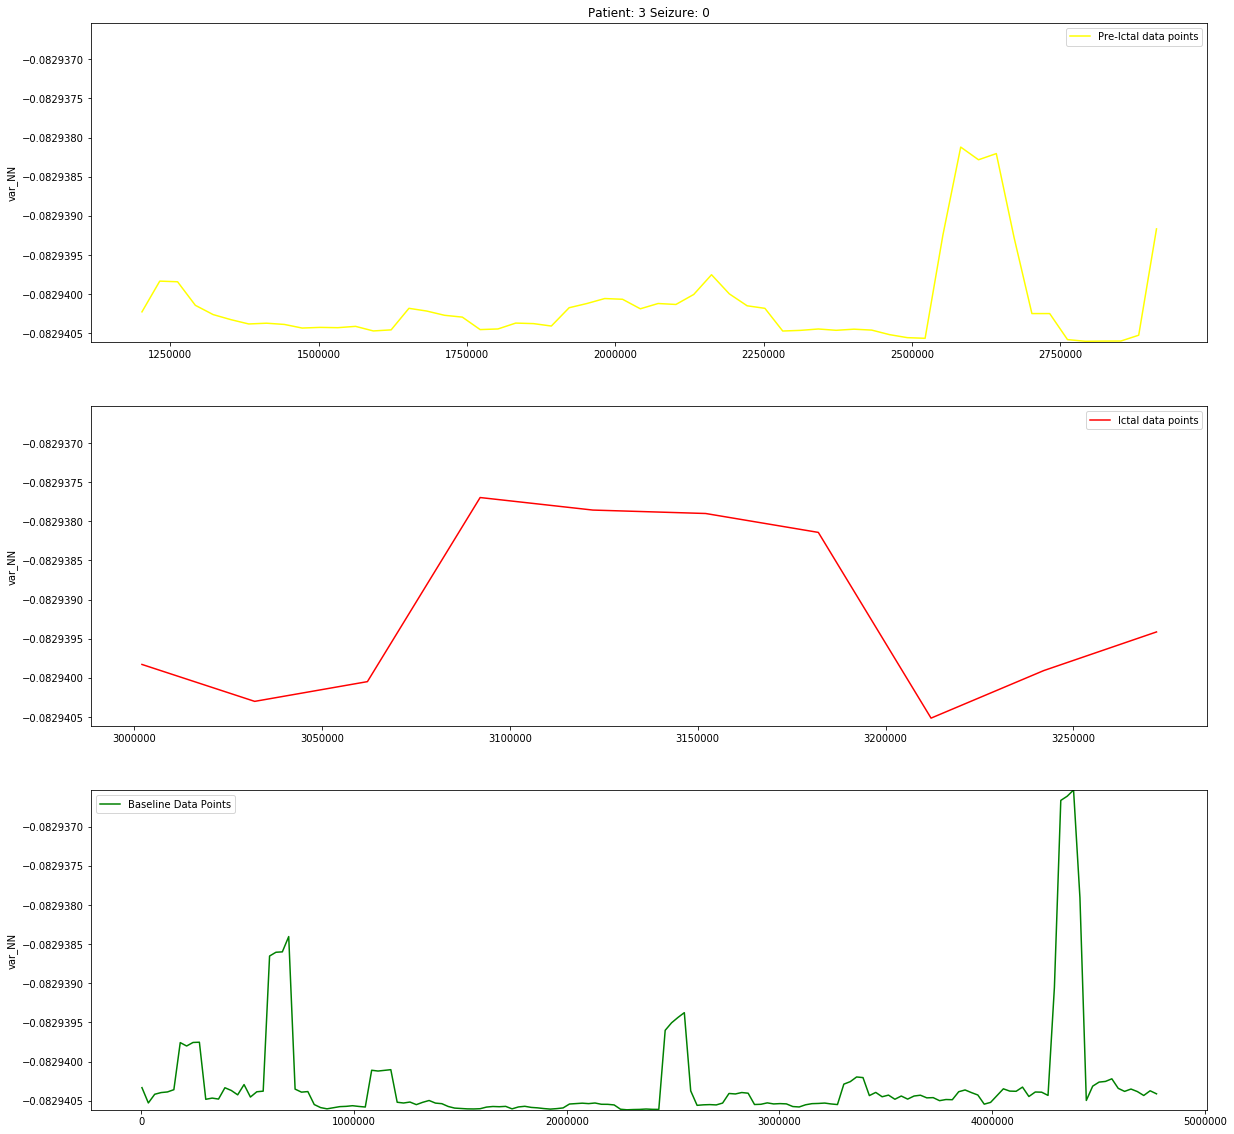

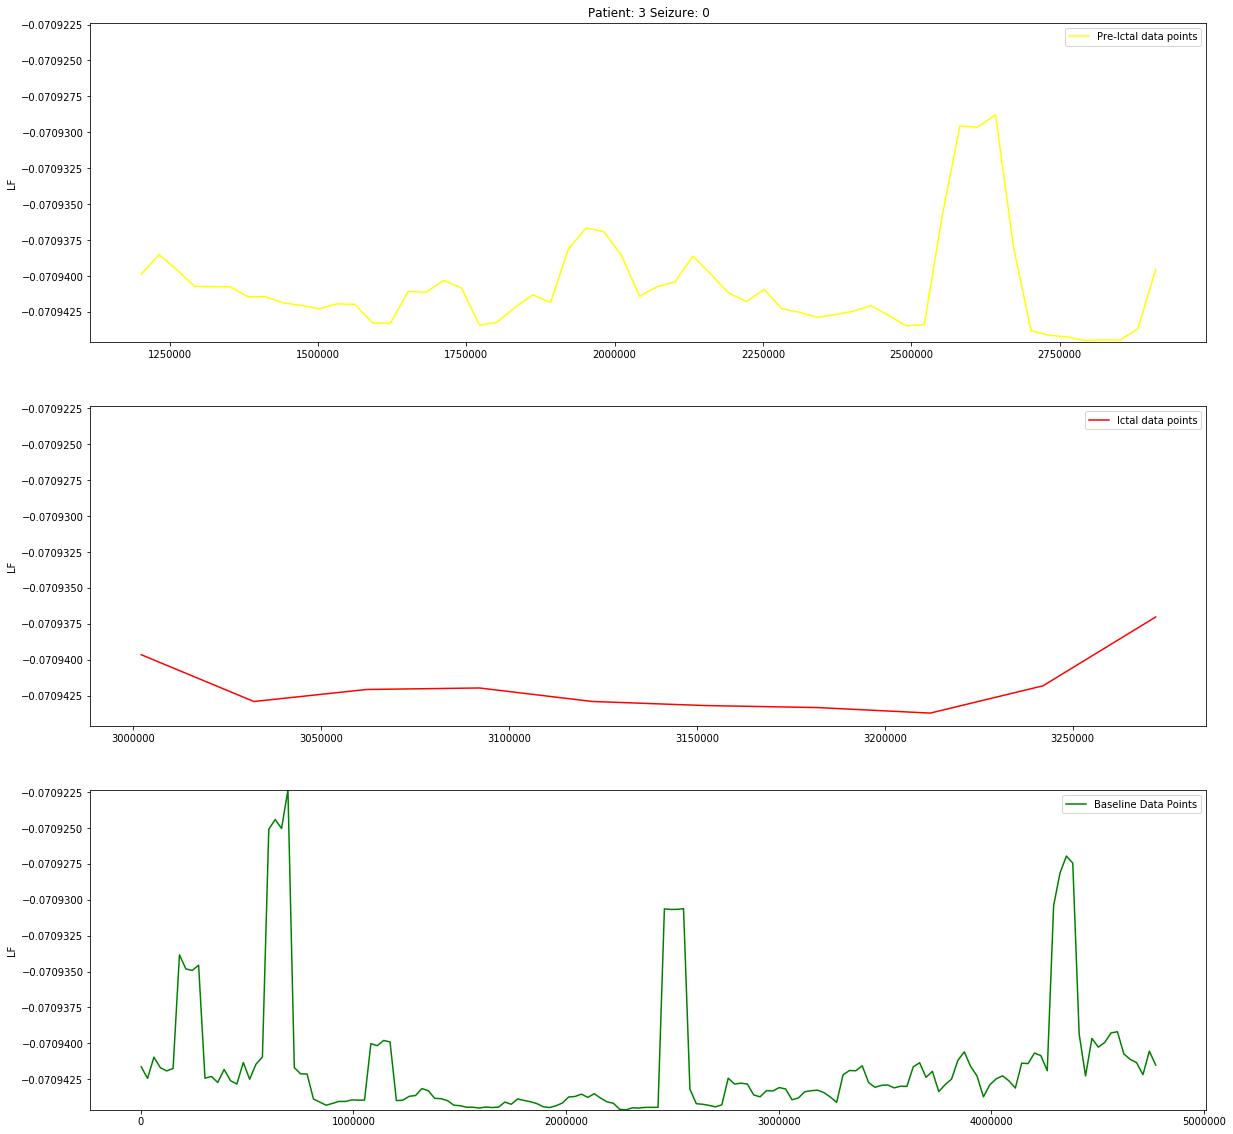

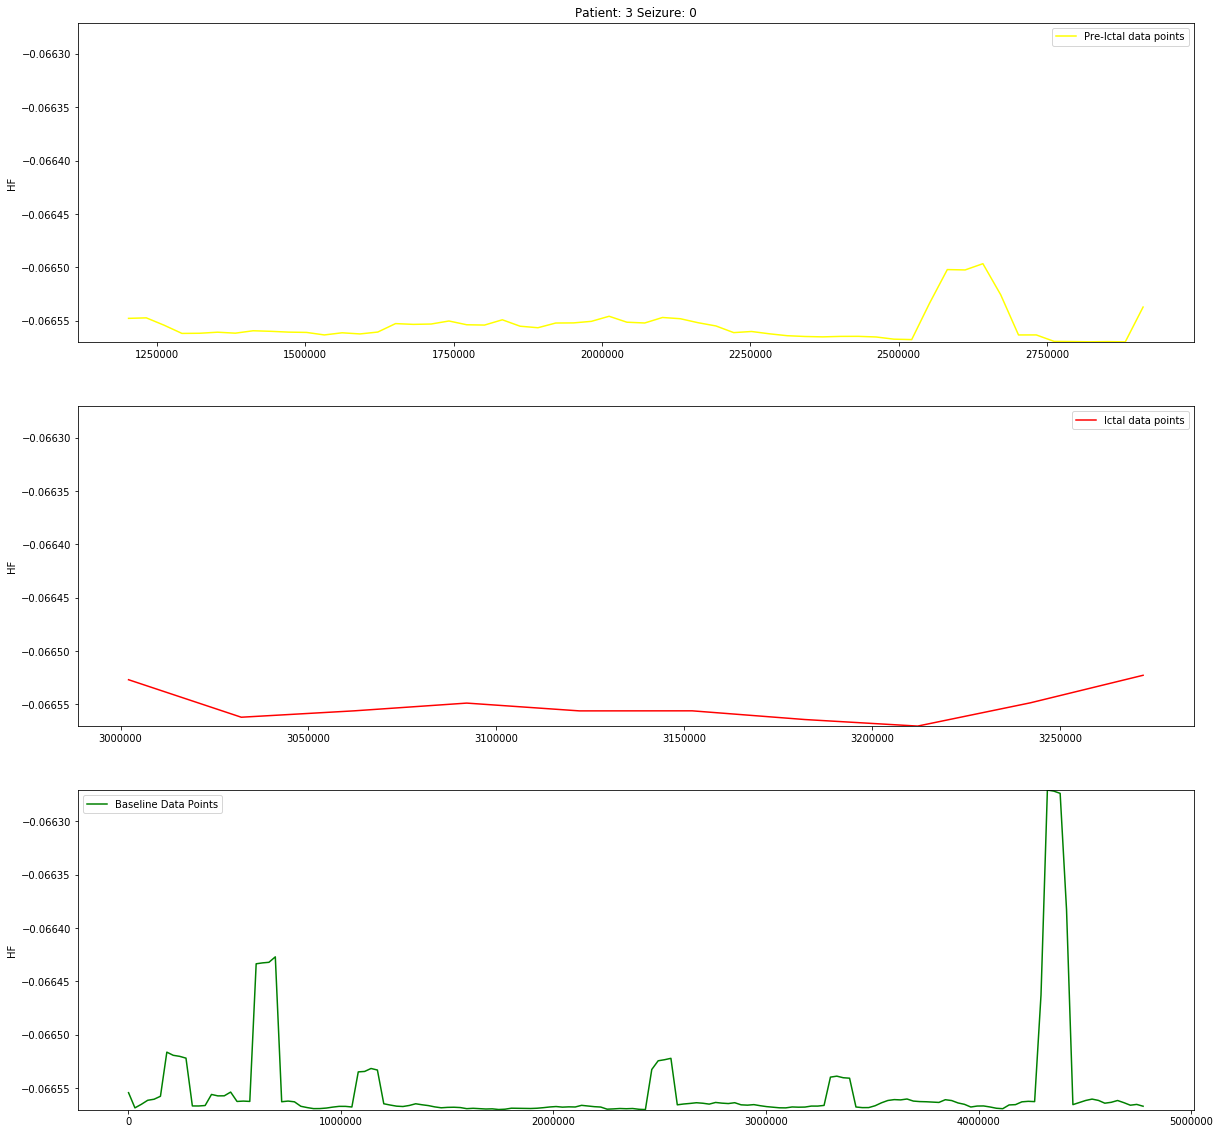

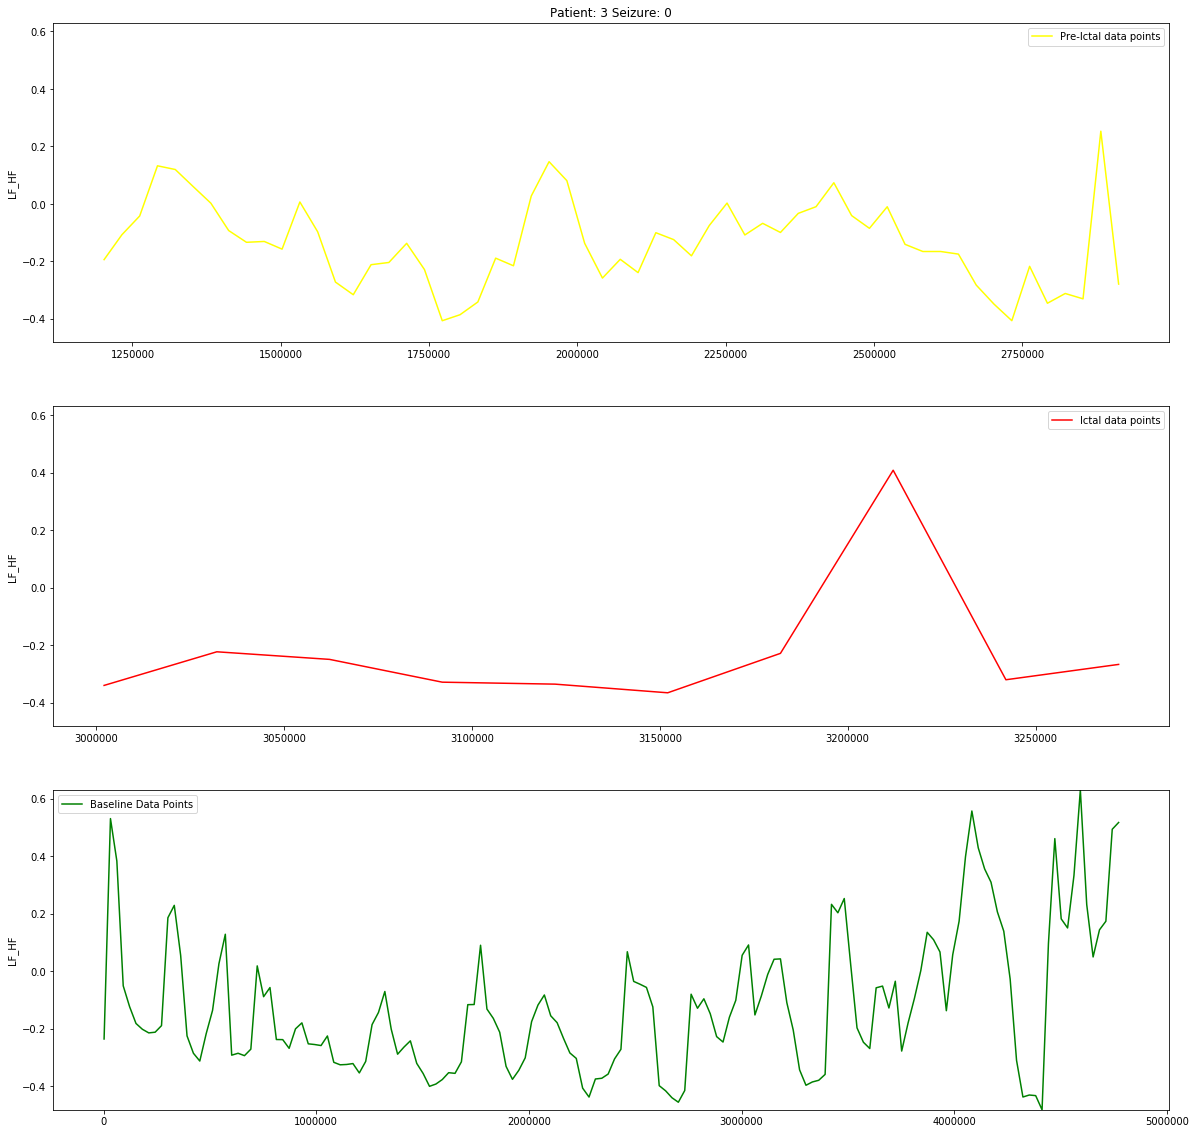

classification/eda/andrews.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X[label_id] = grouped_df[label_id]


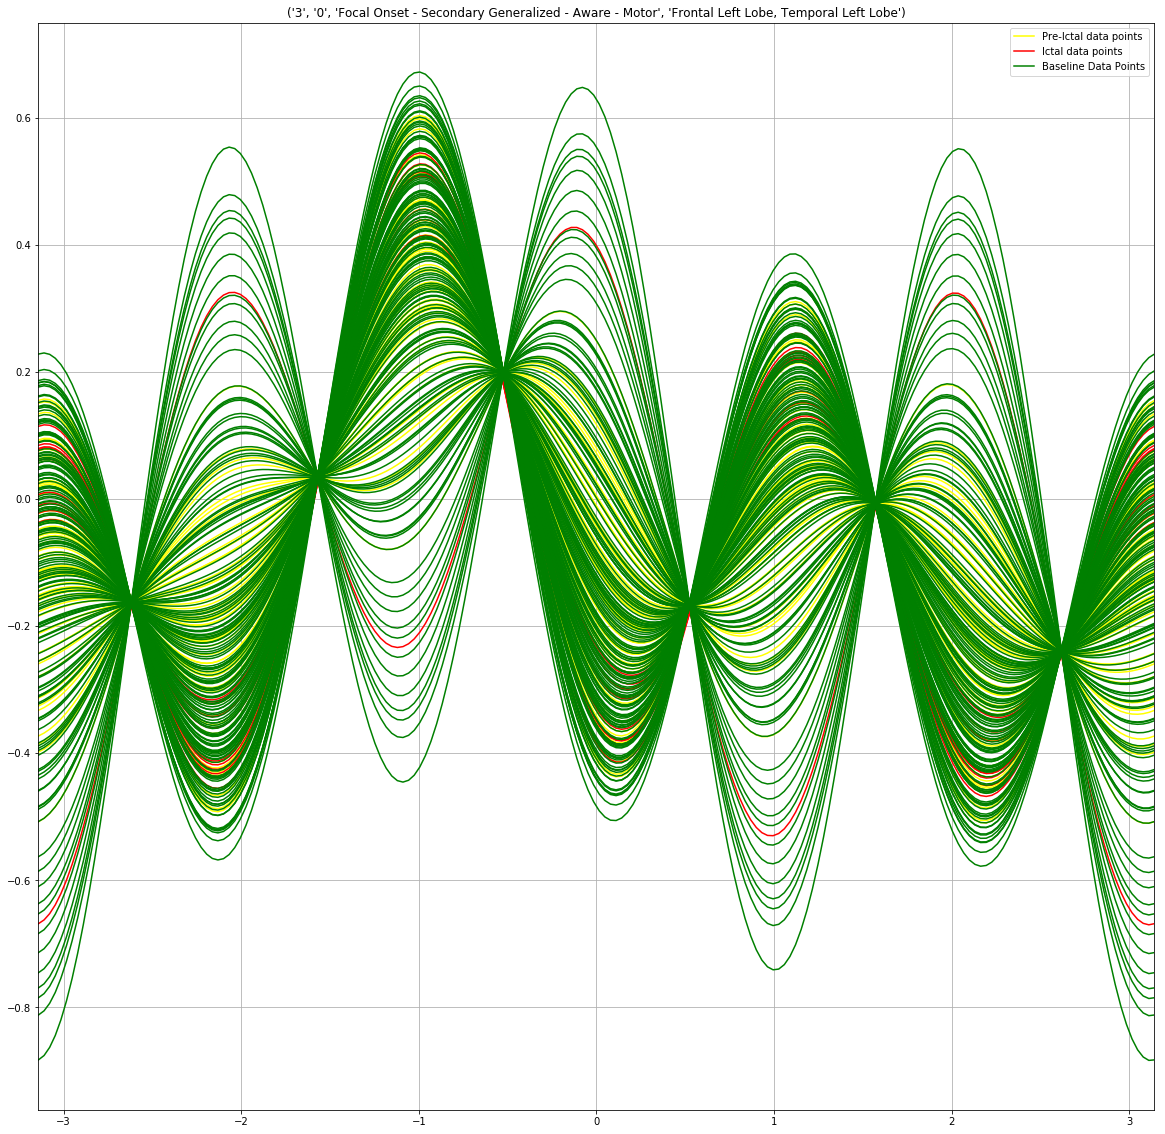

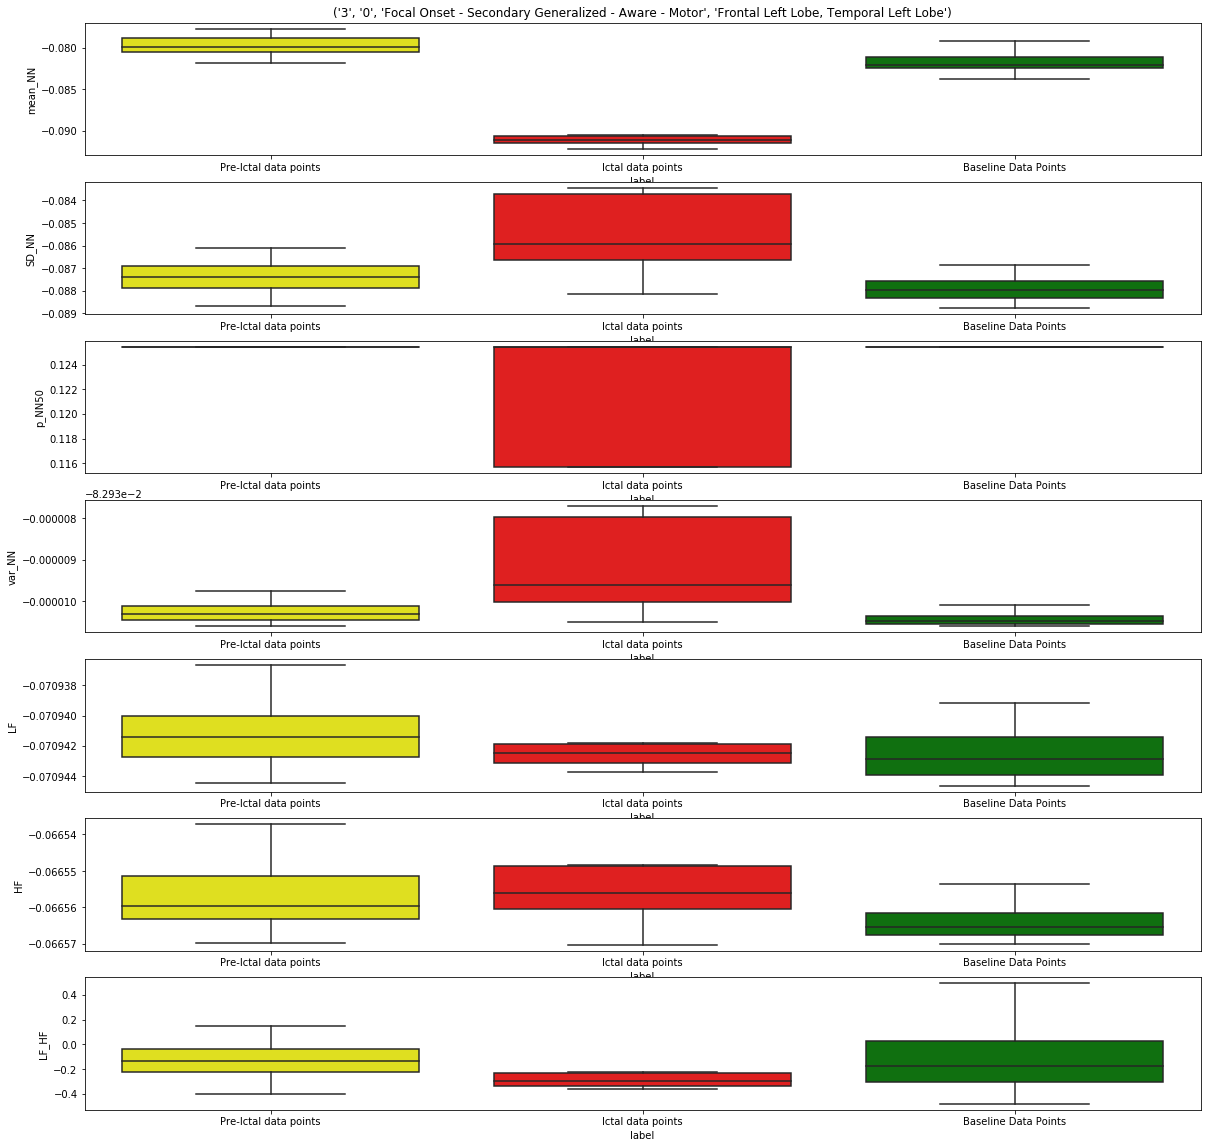

classification/eda/scatter.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X[label_id] = grouped_df[label_id]


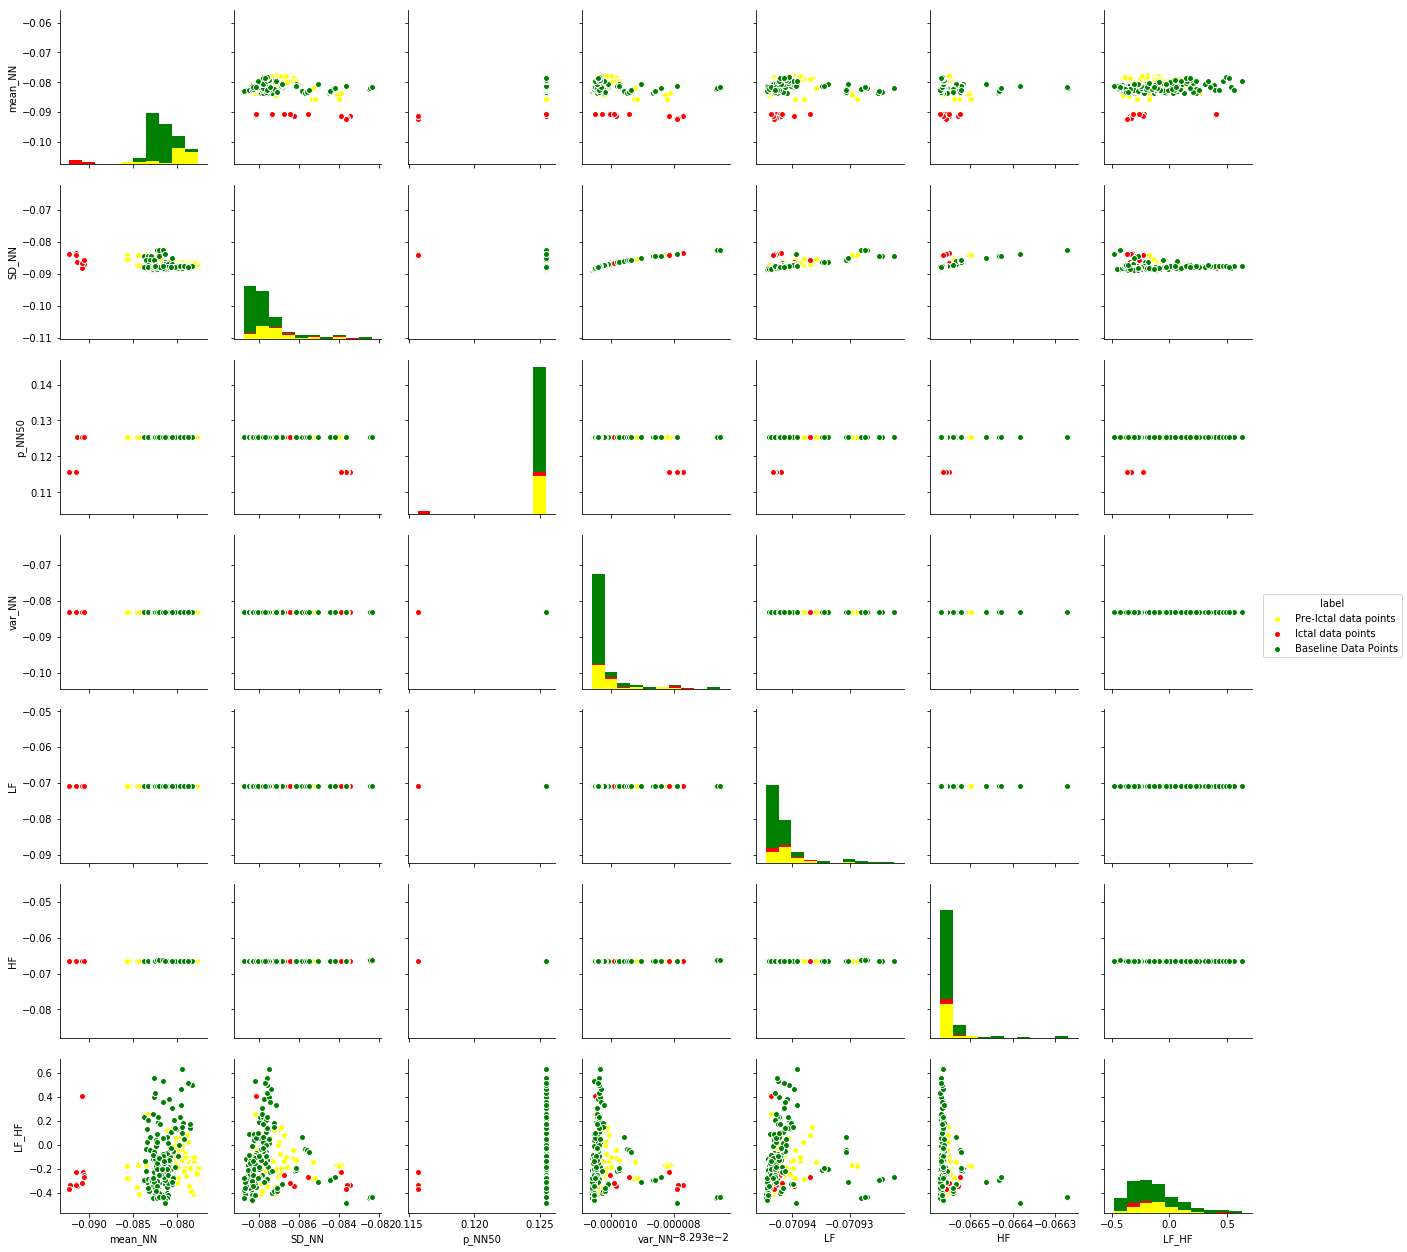

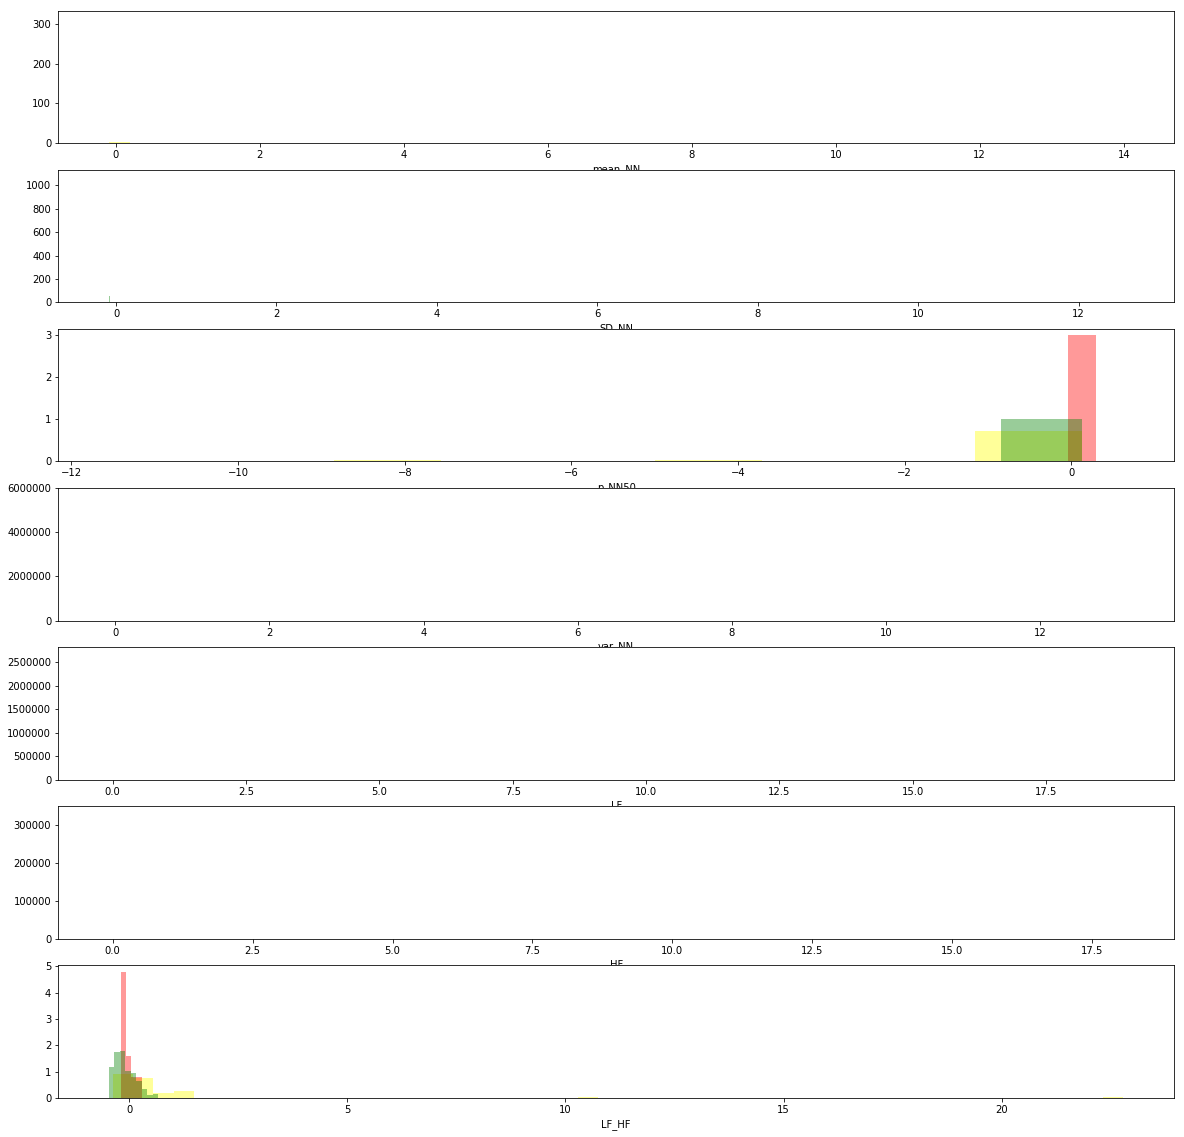

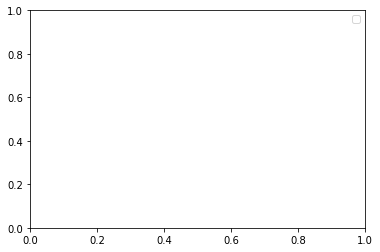

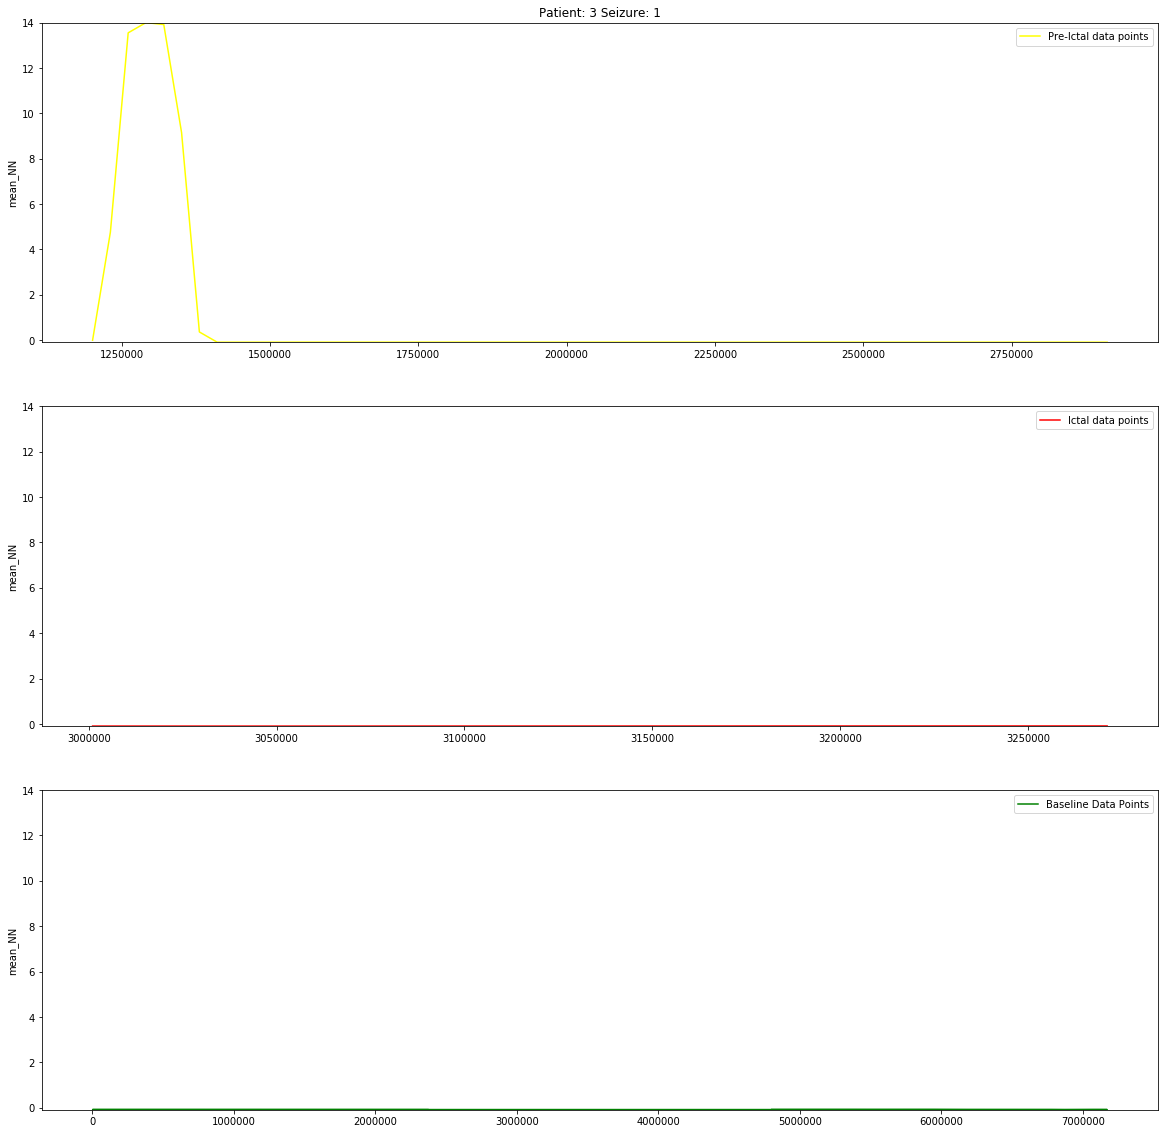

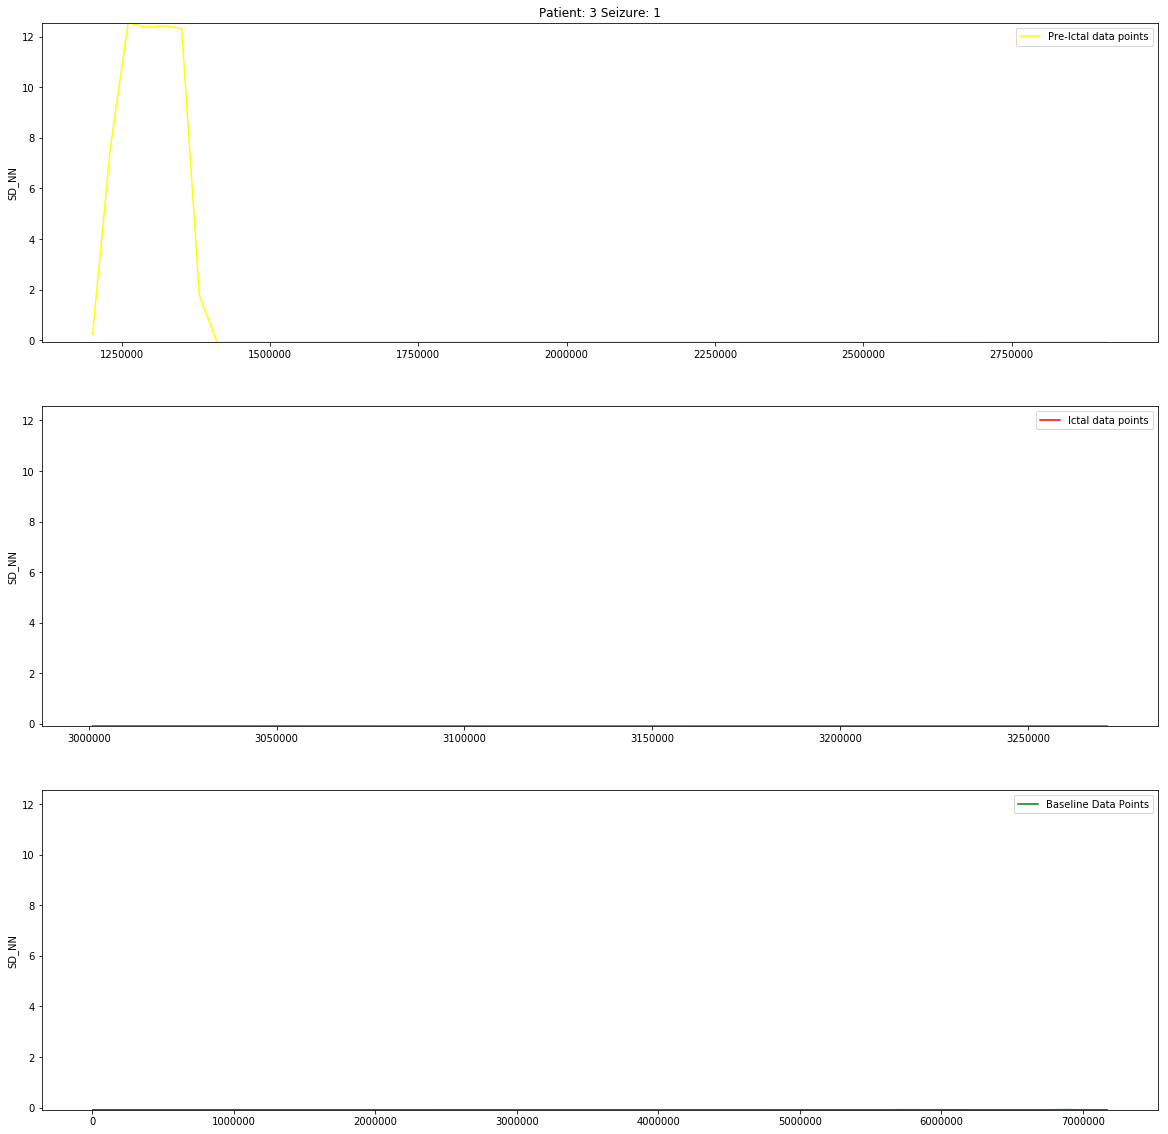

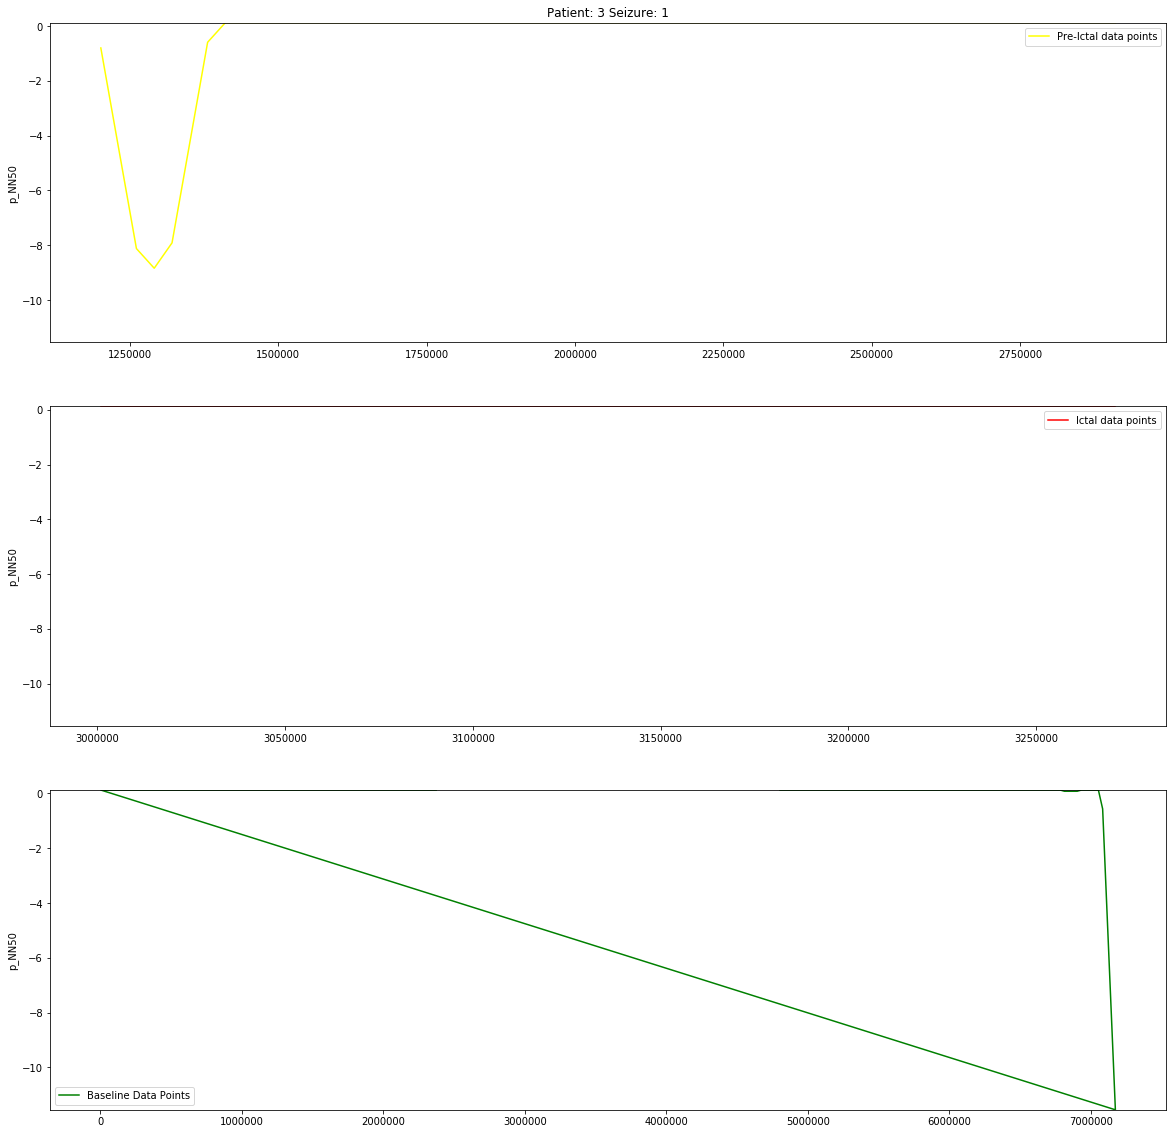

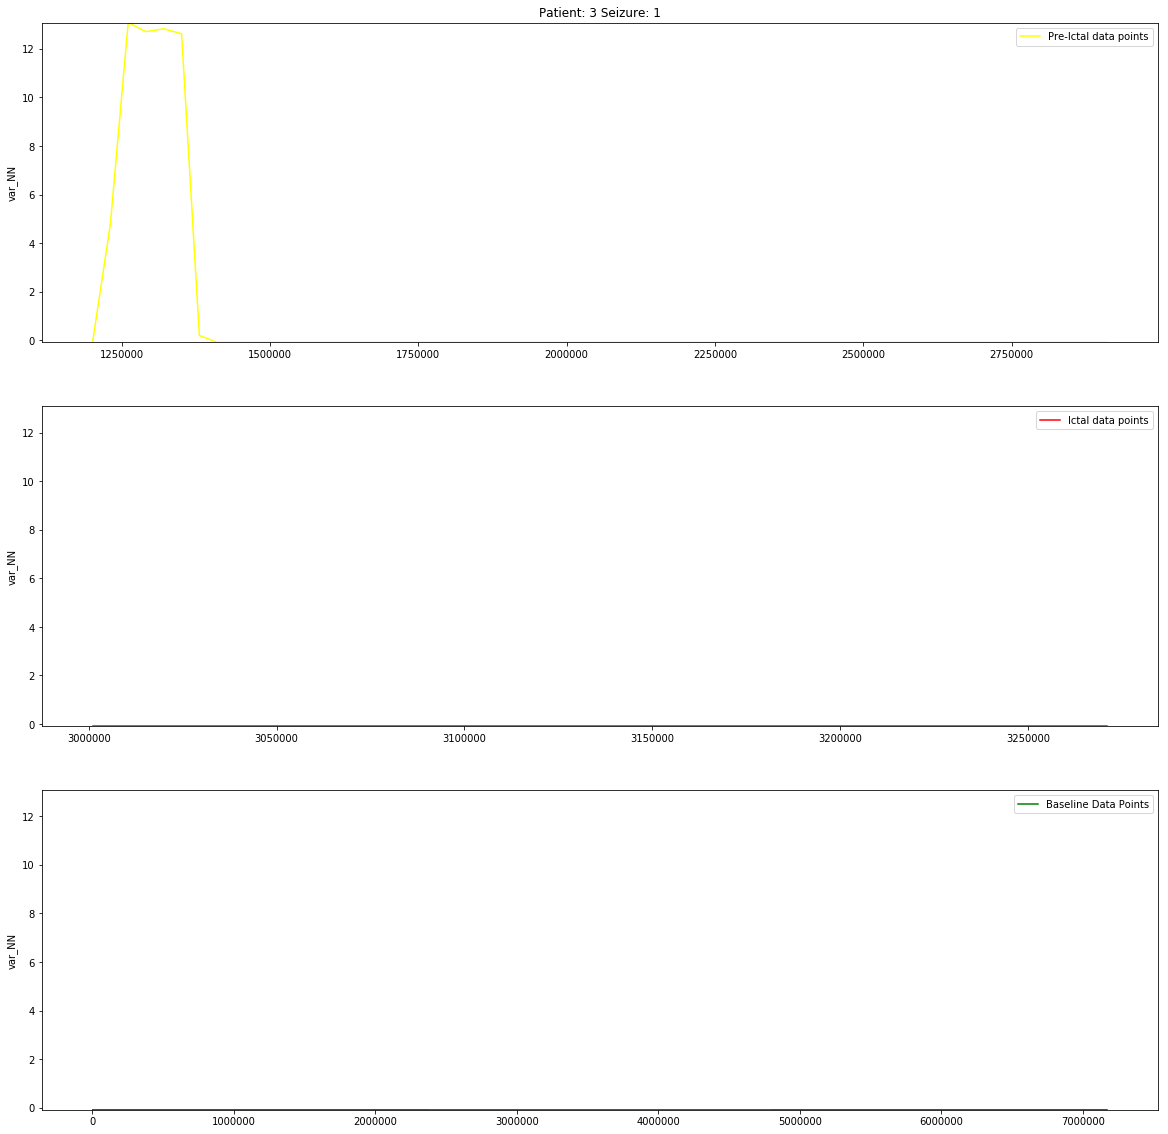

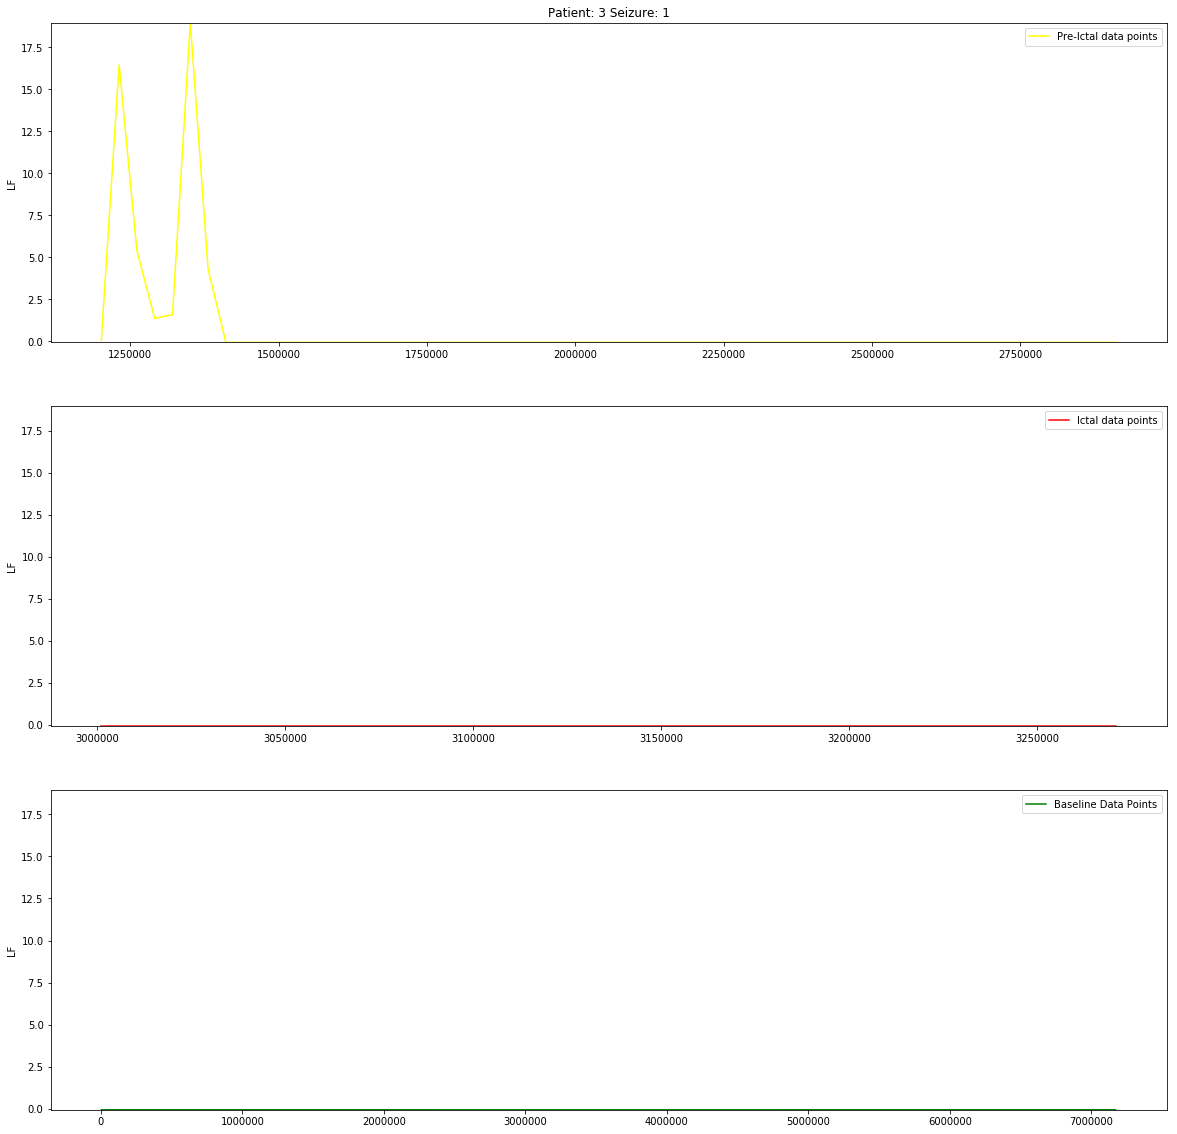

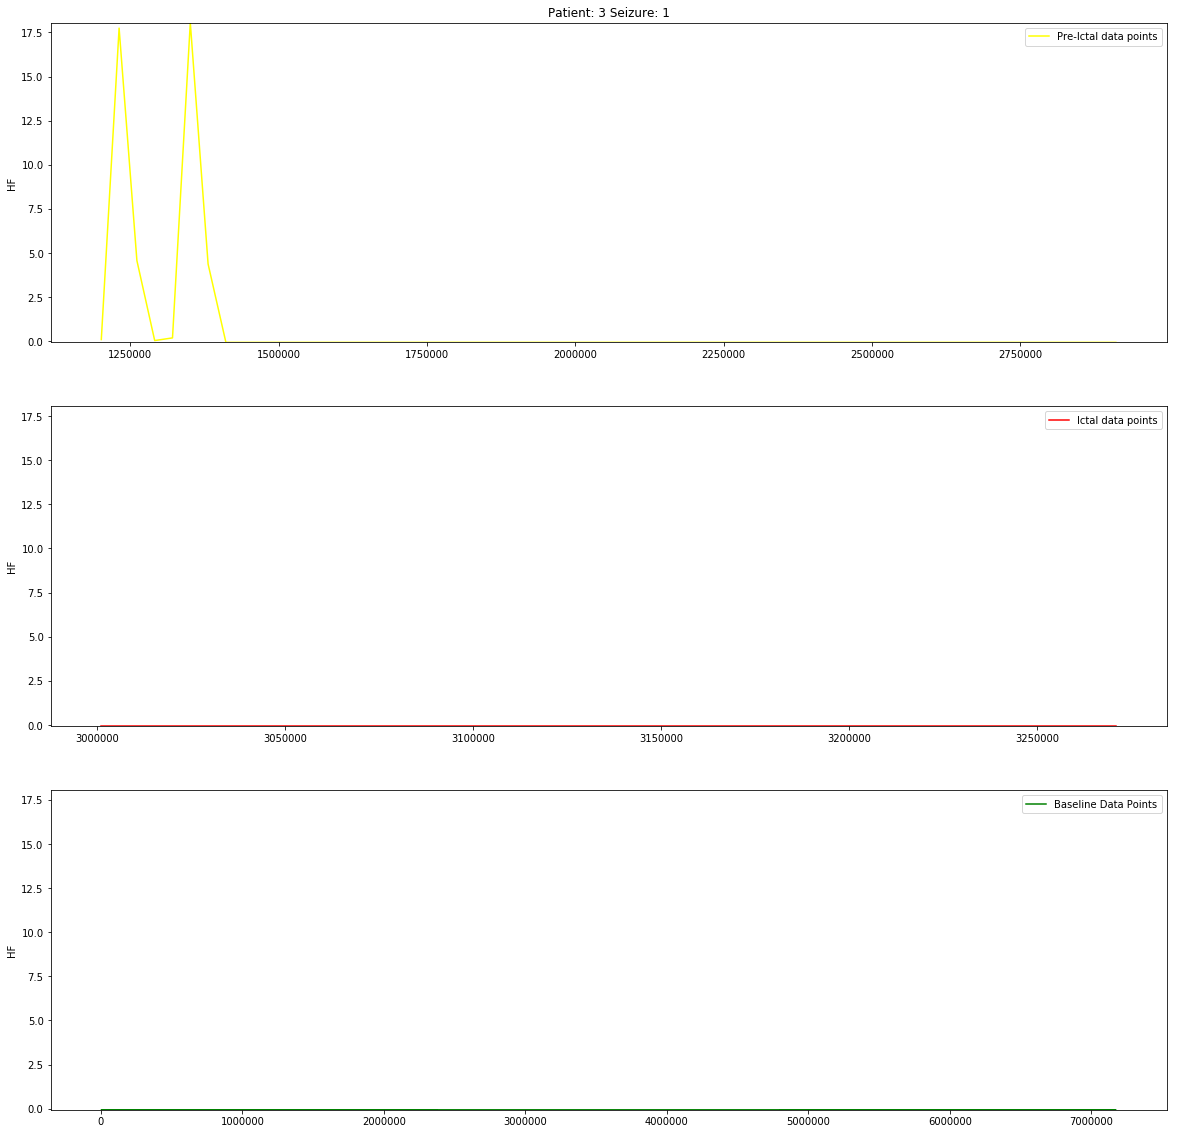

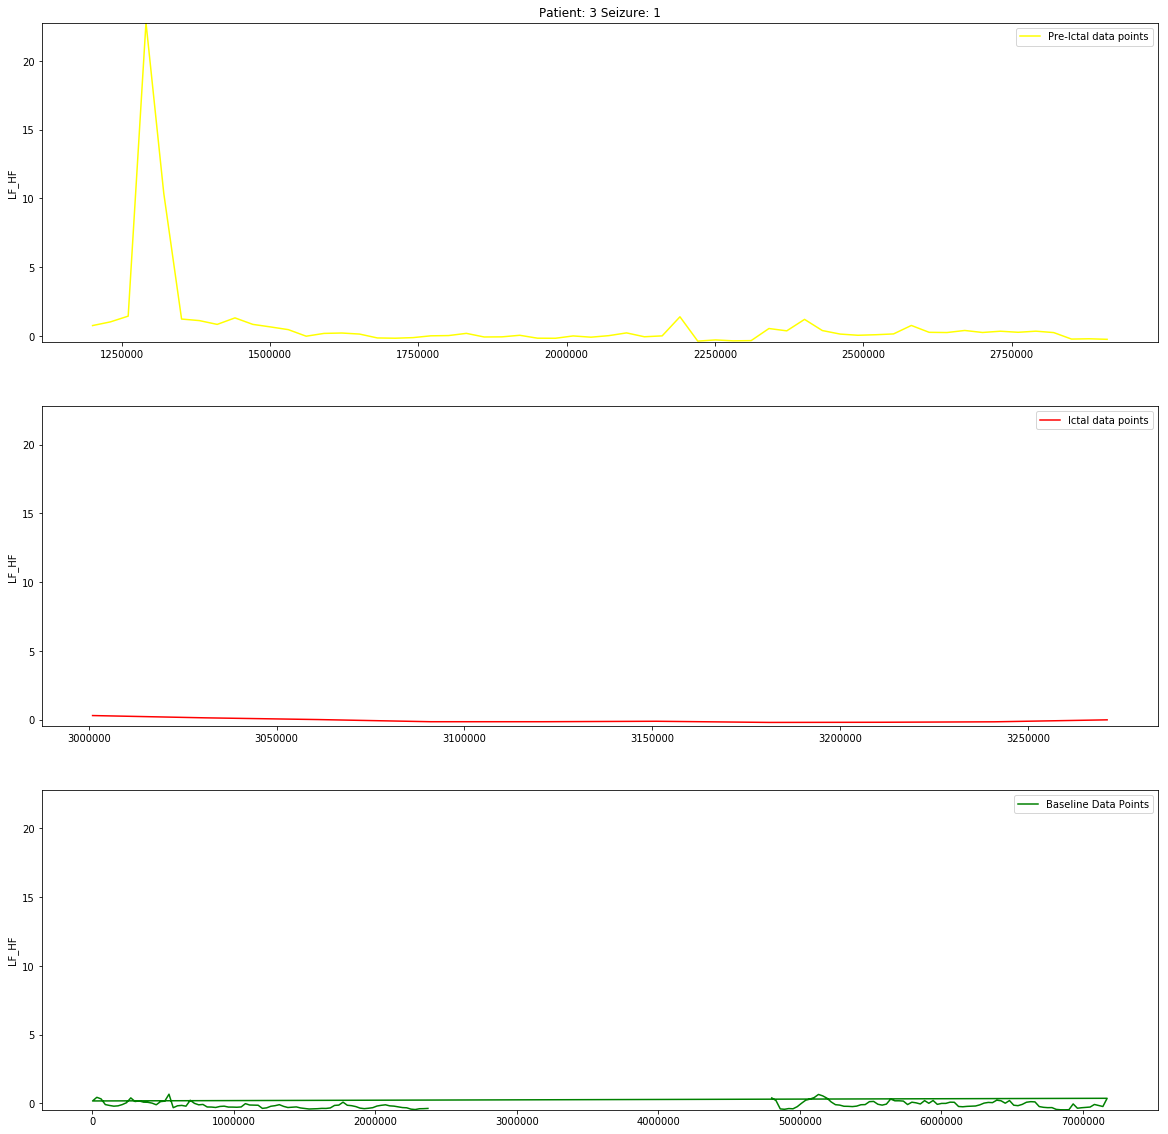

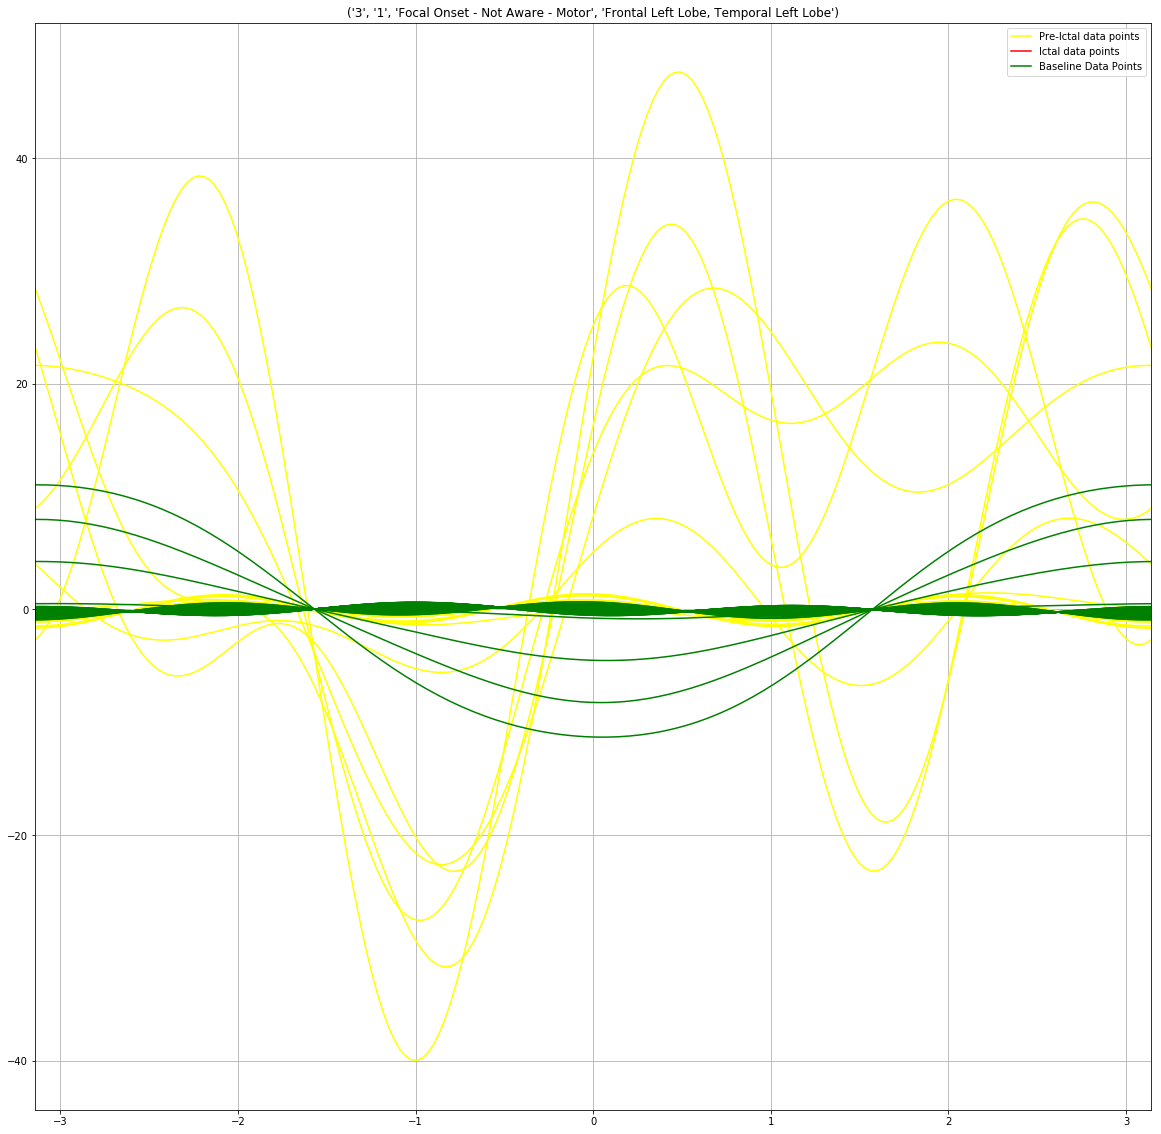

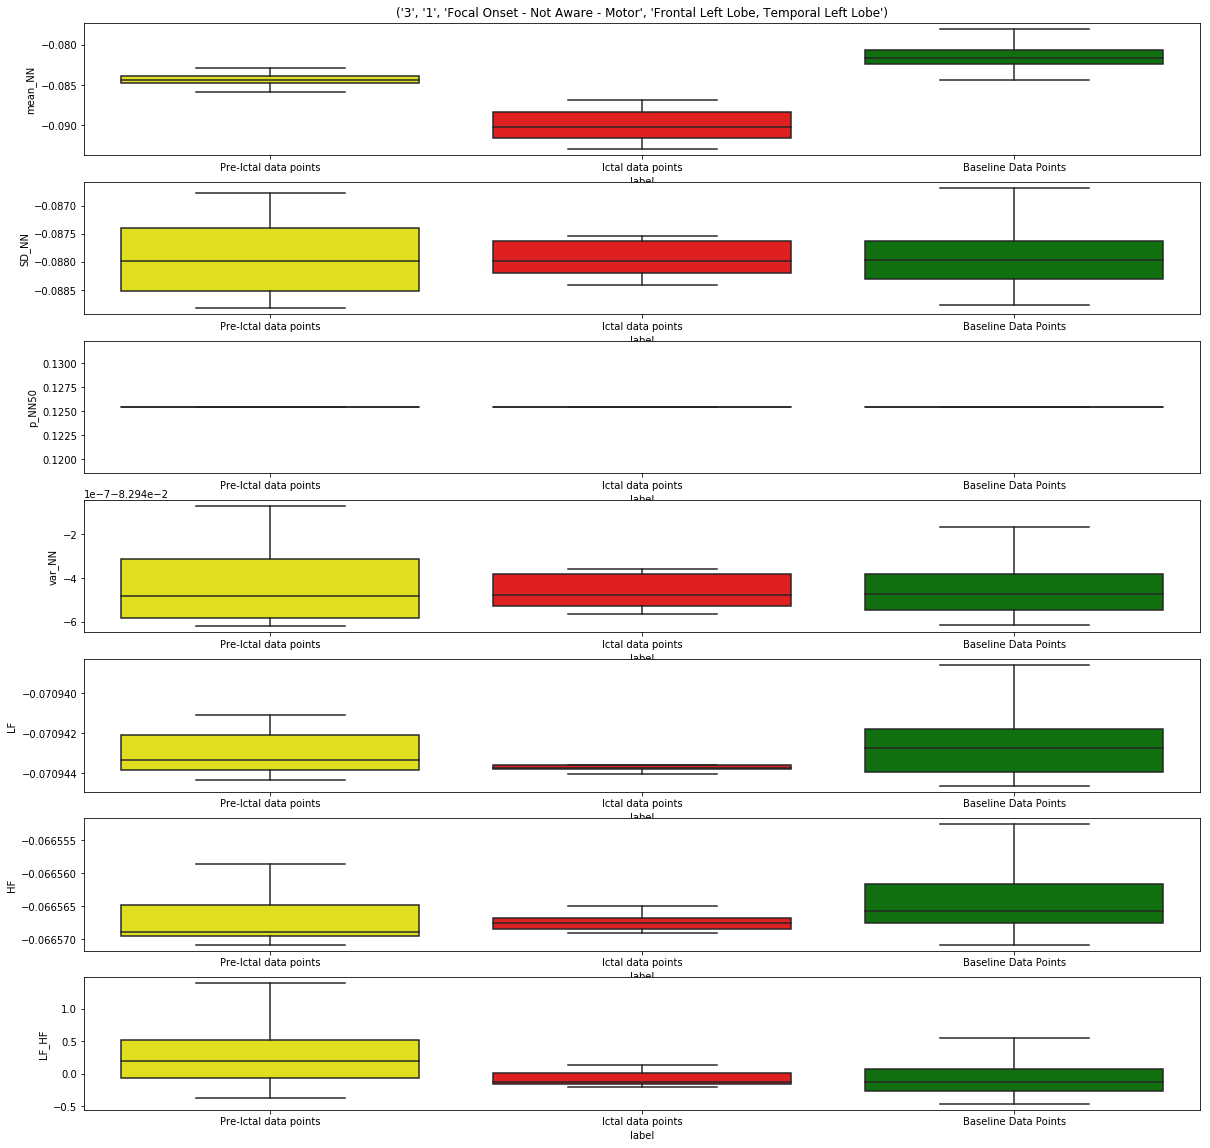

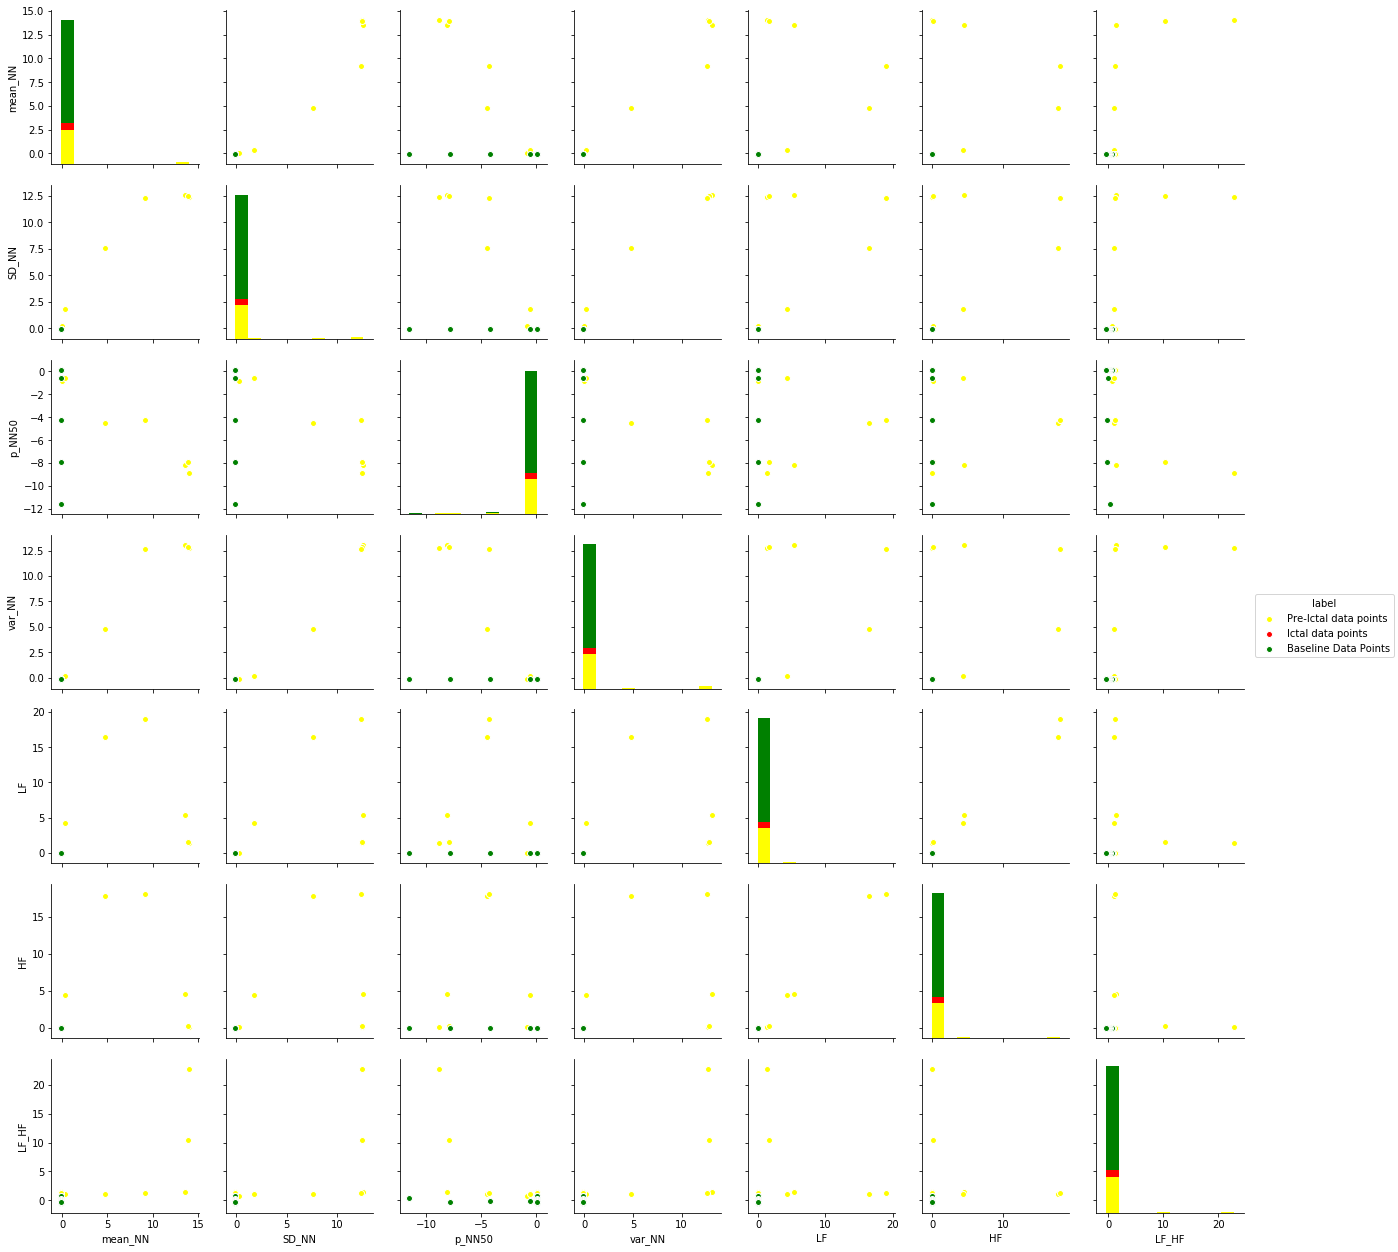

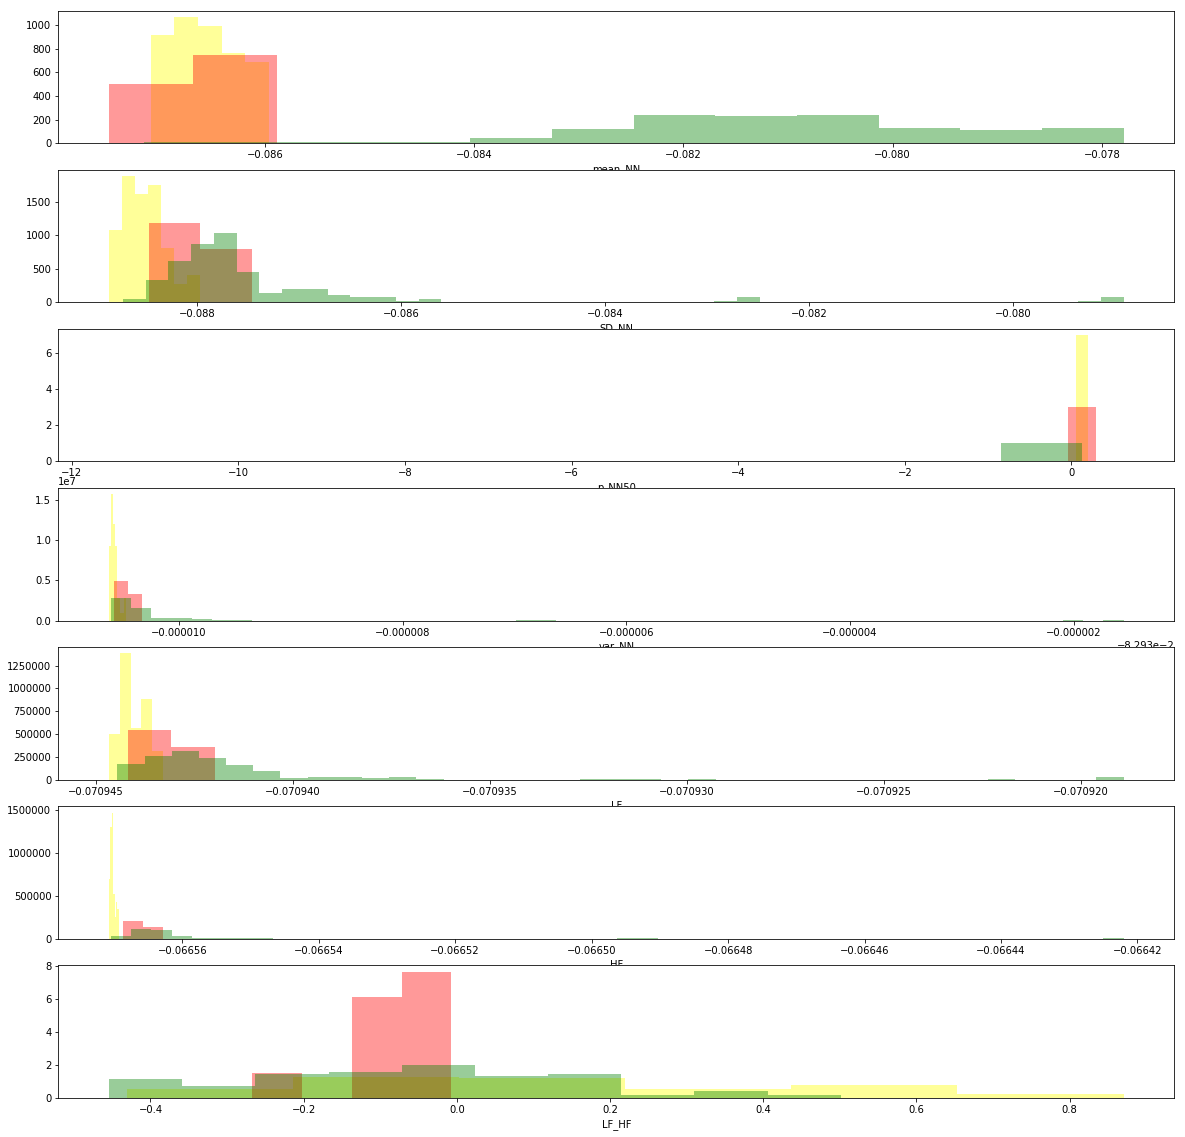

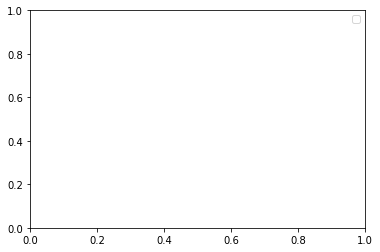

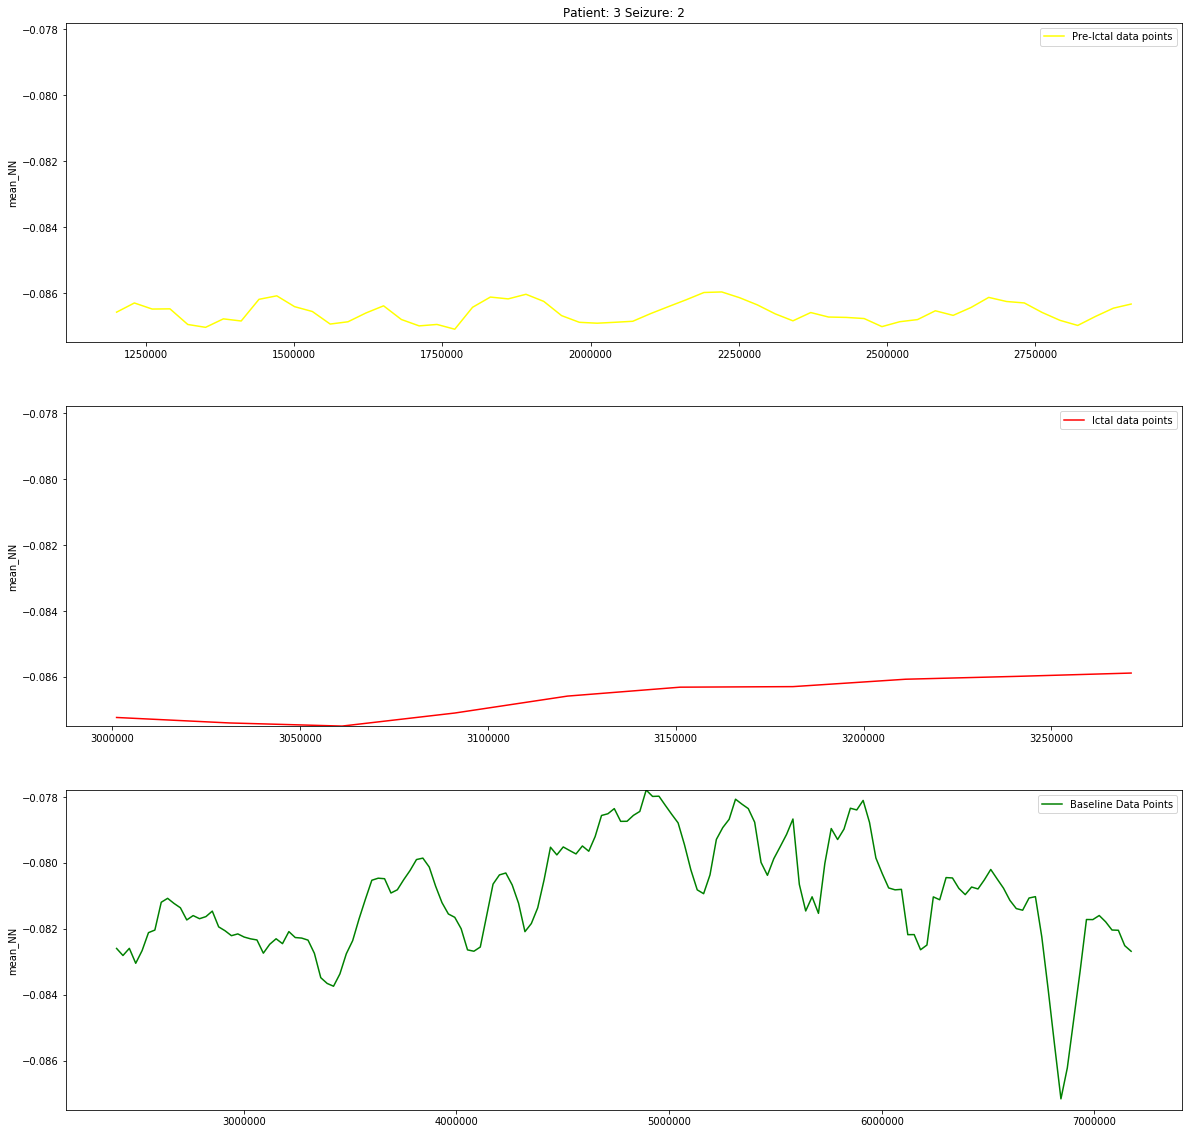

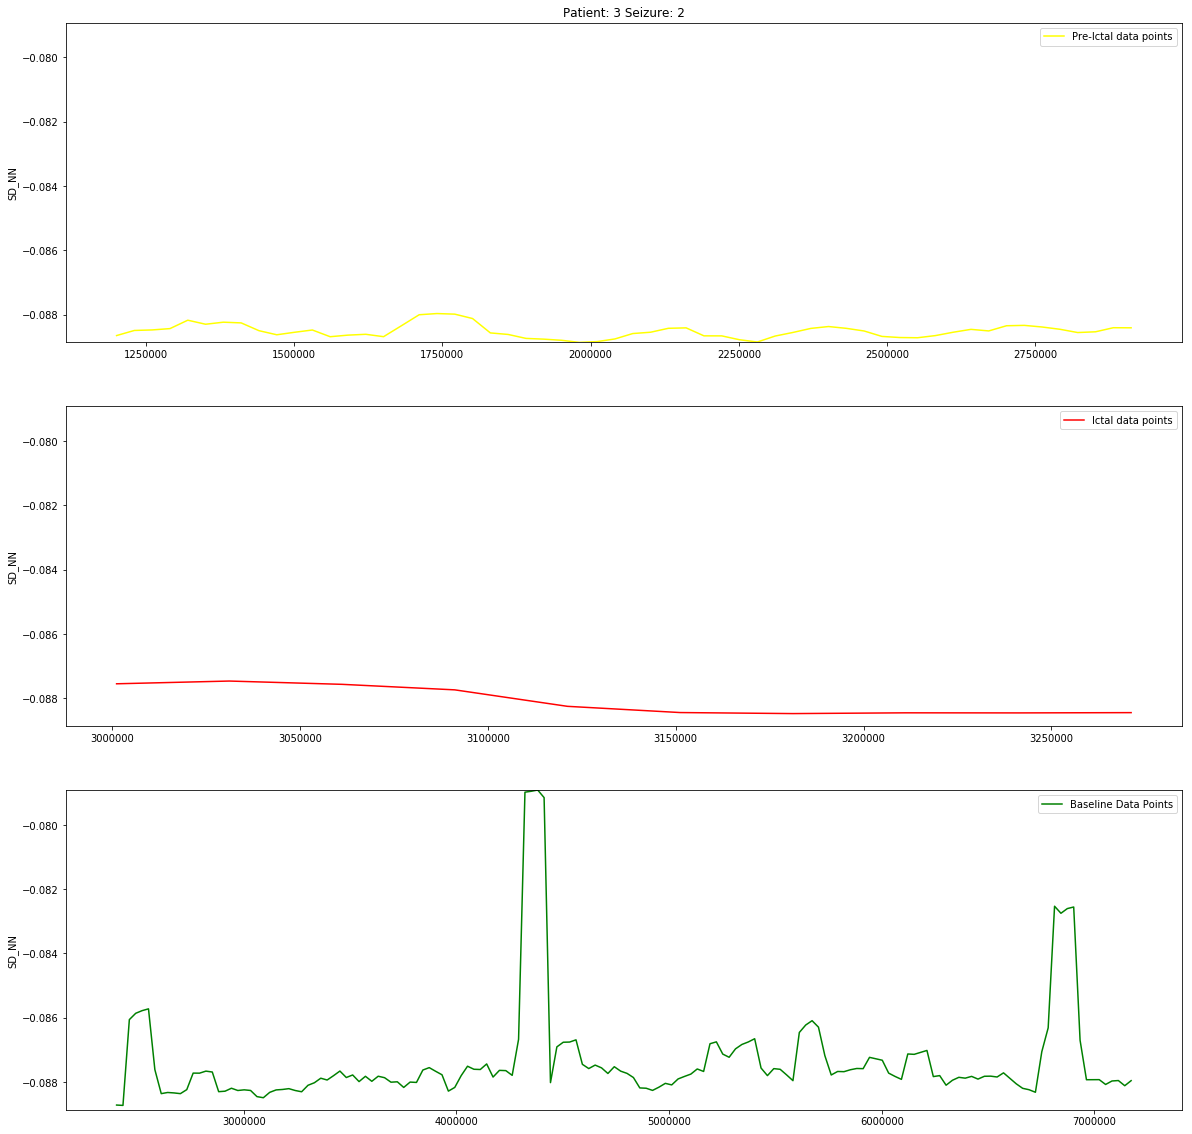

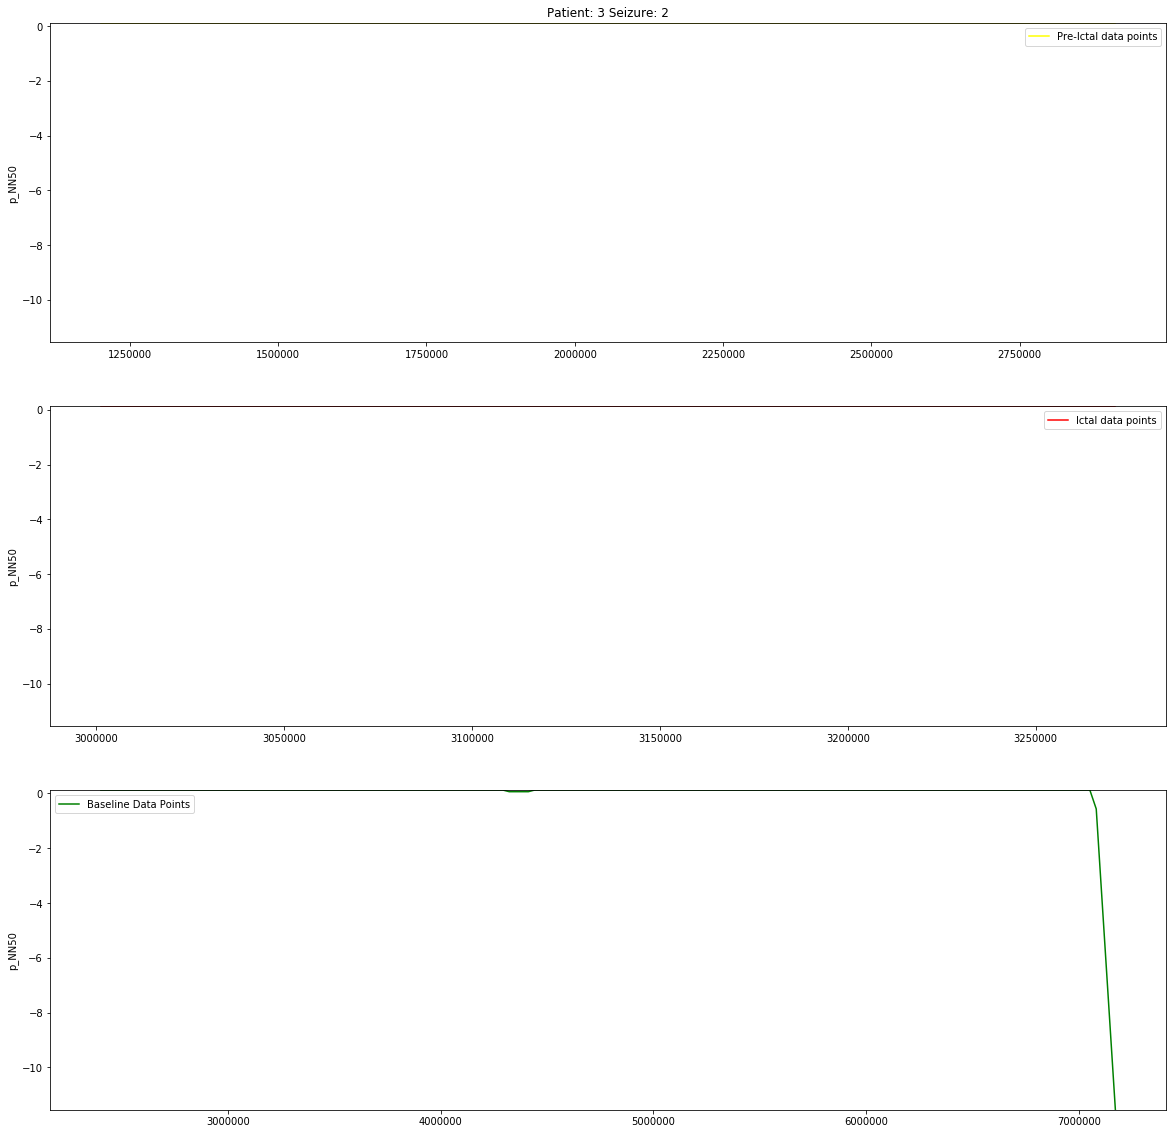

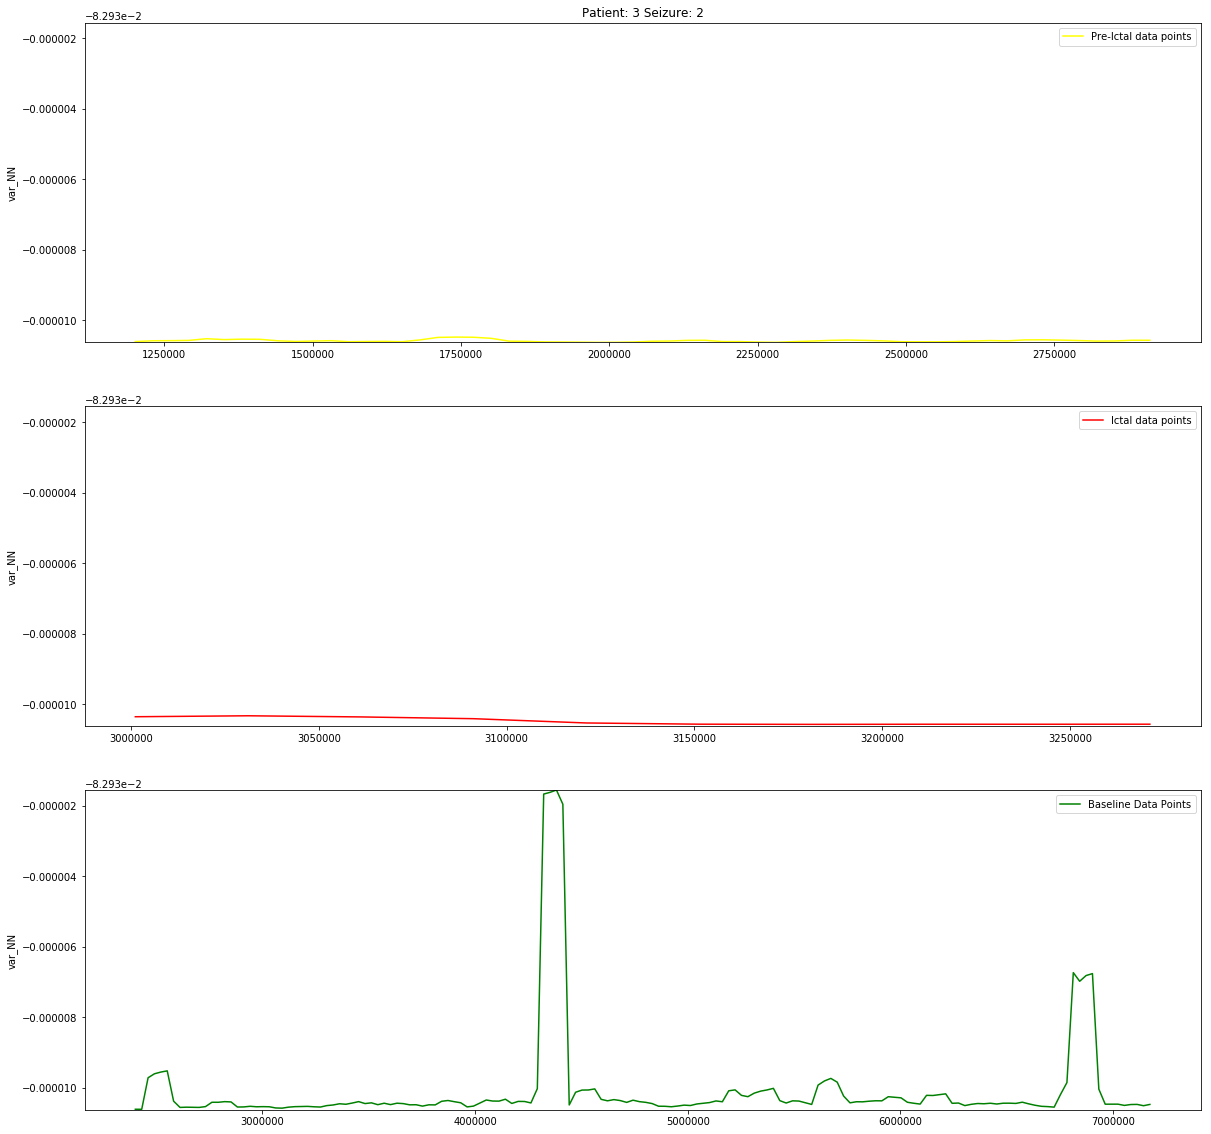

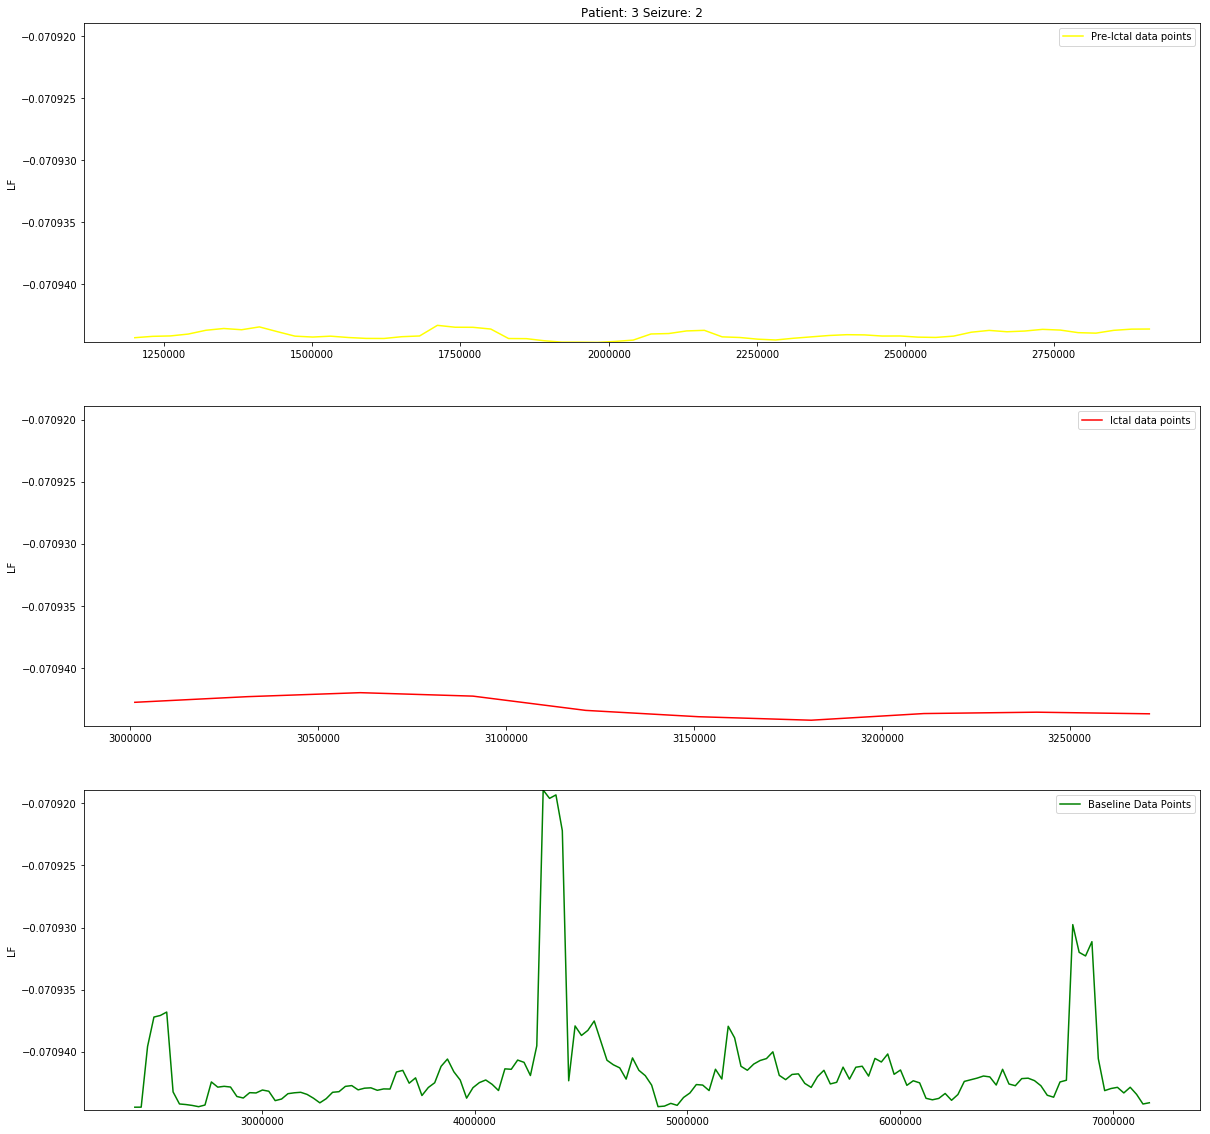

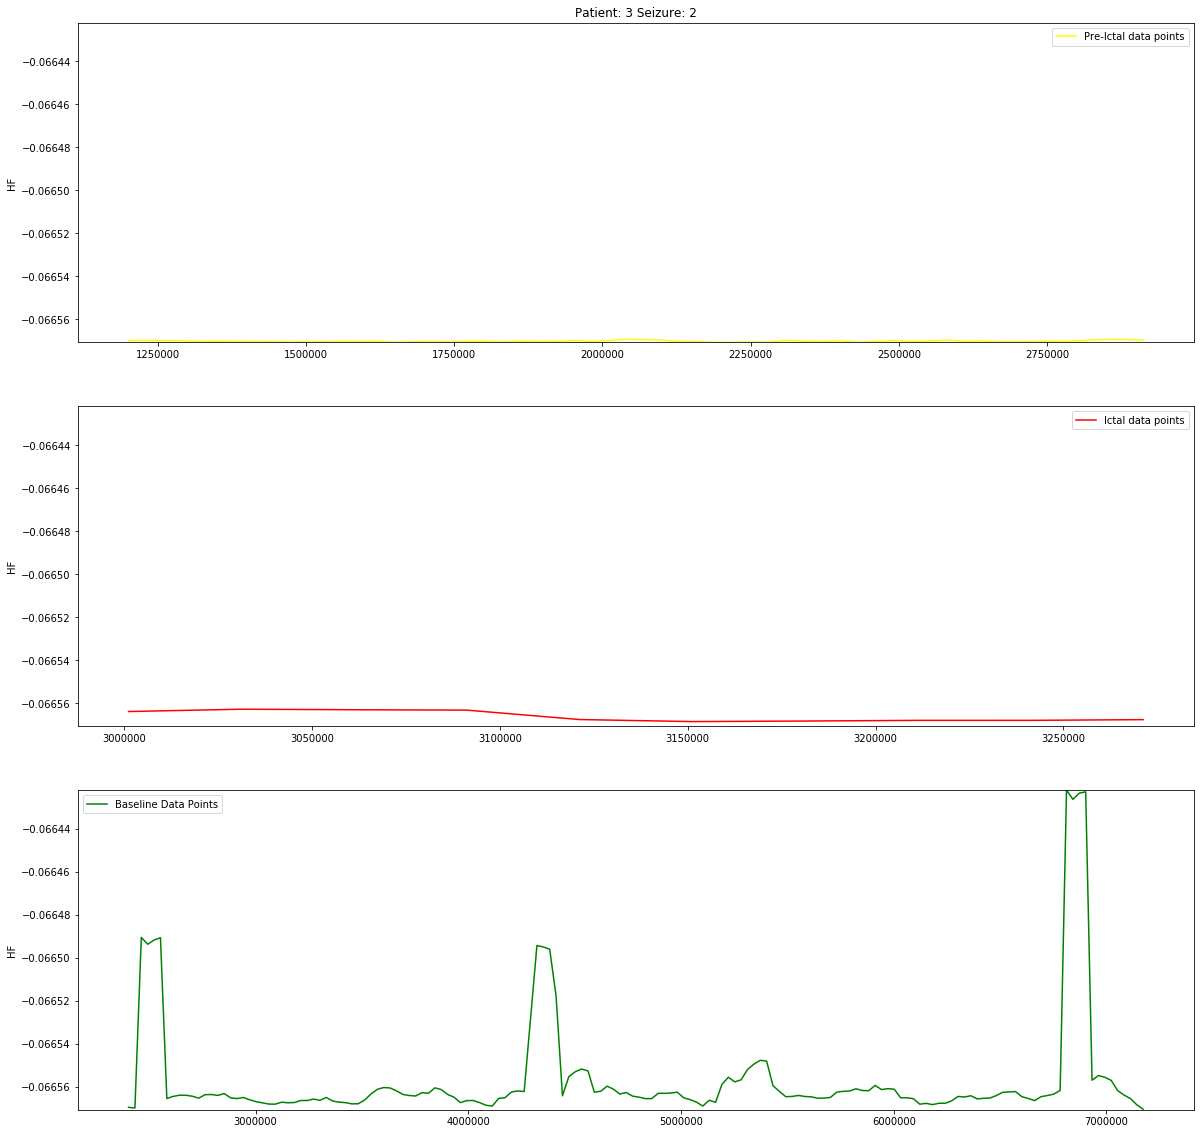

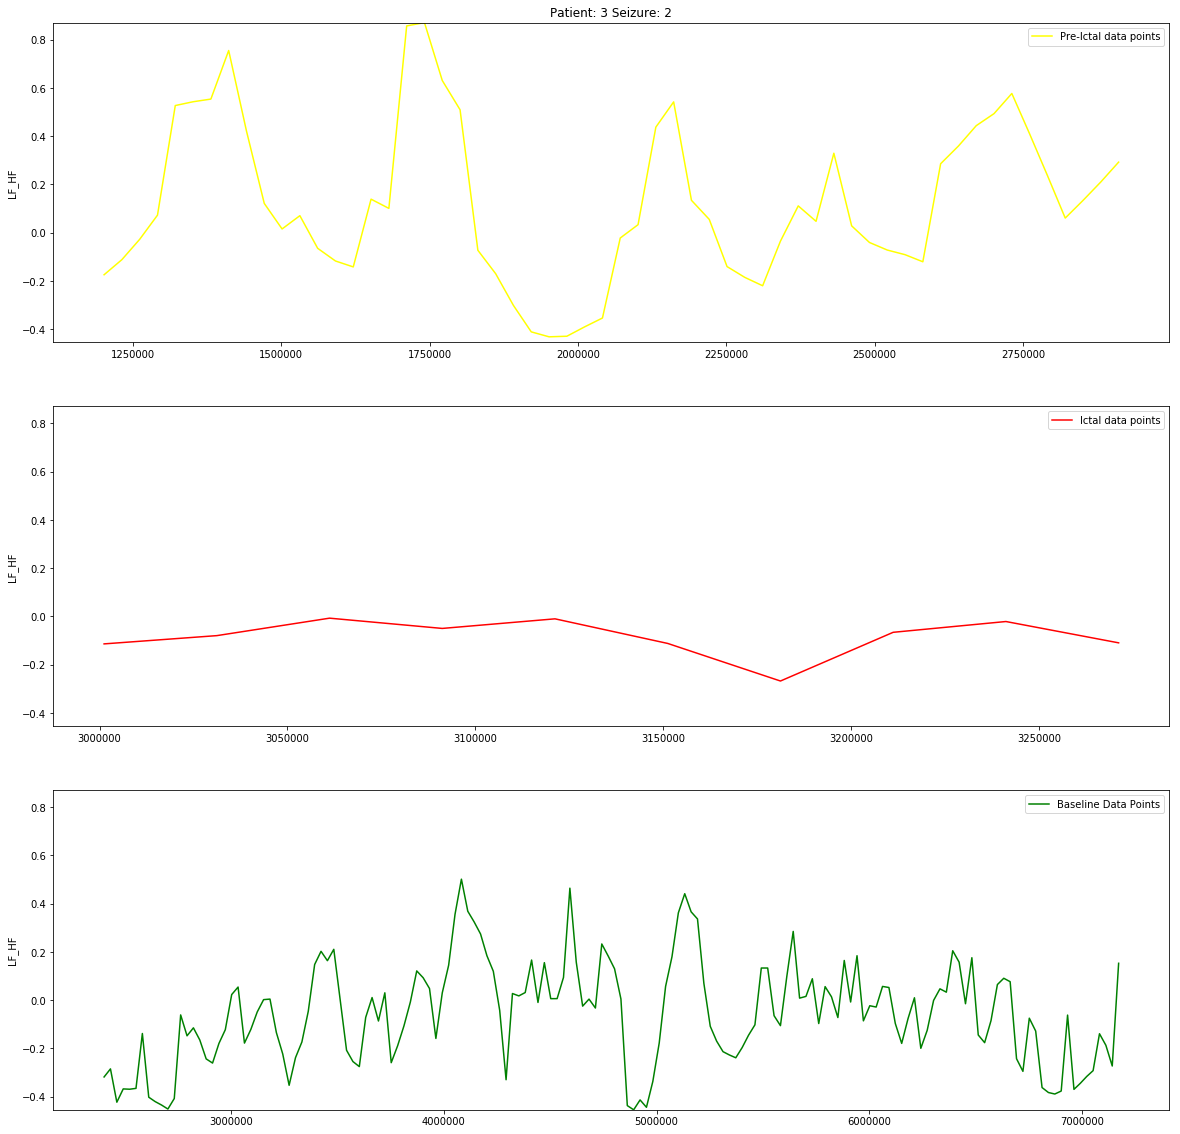

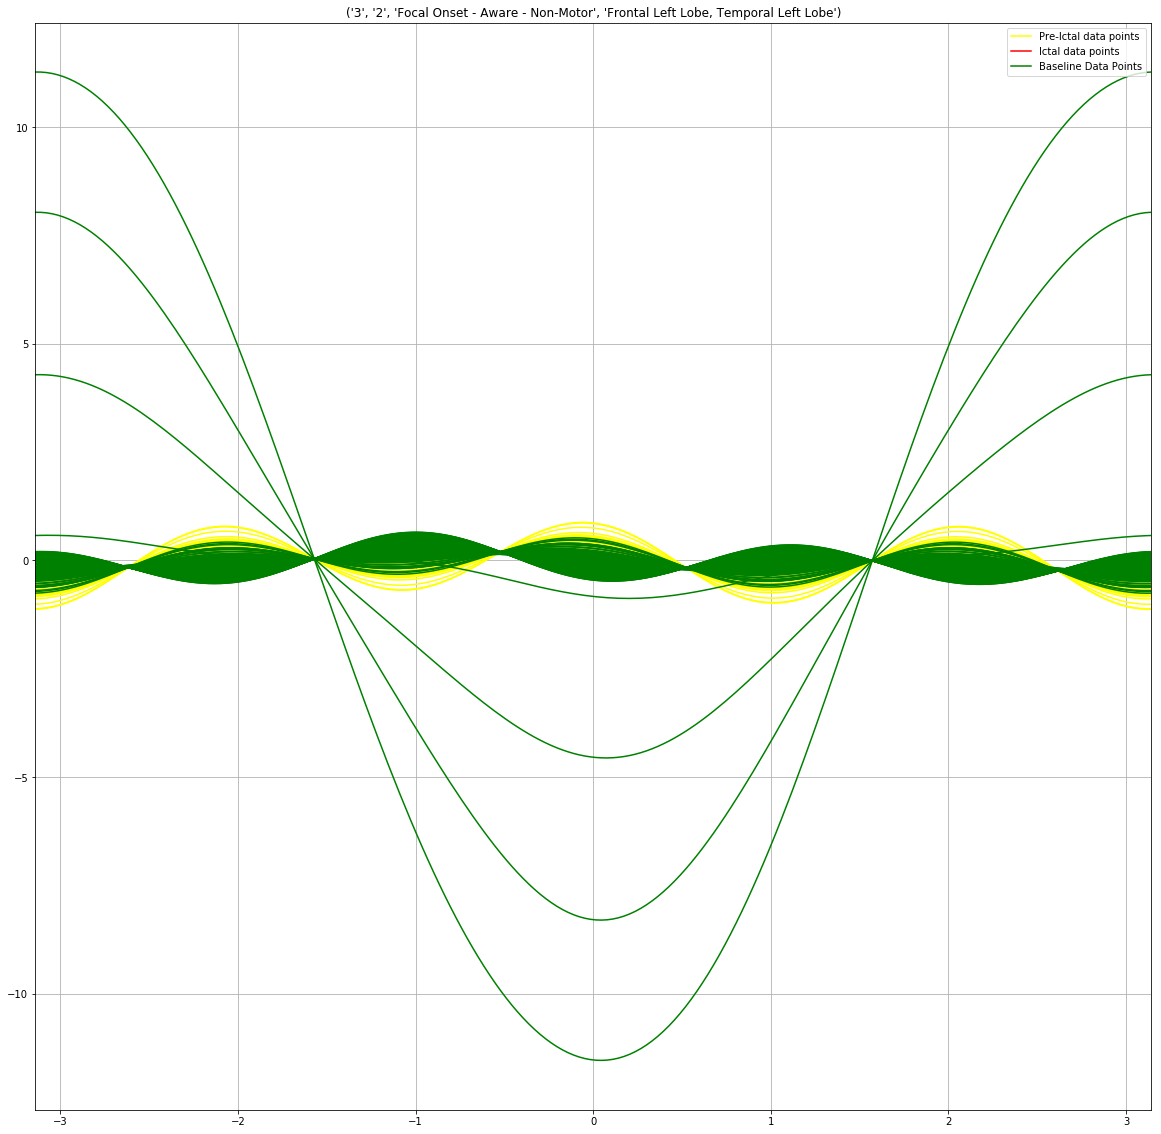

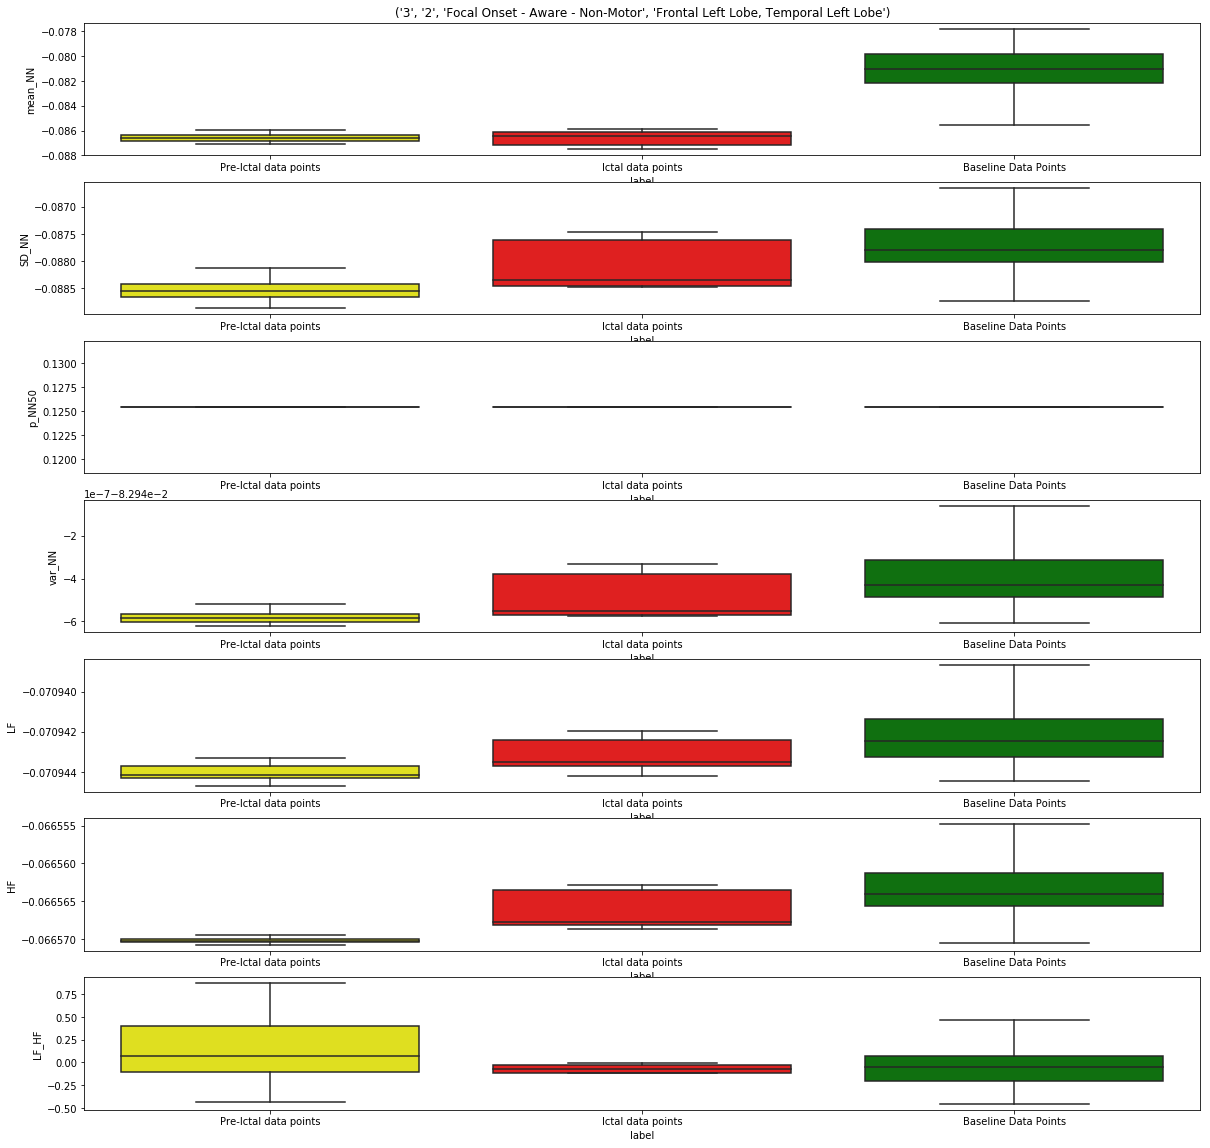

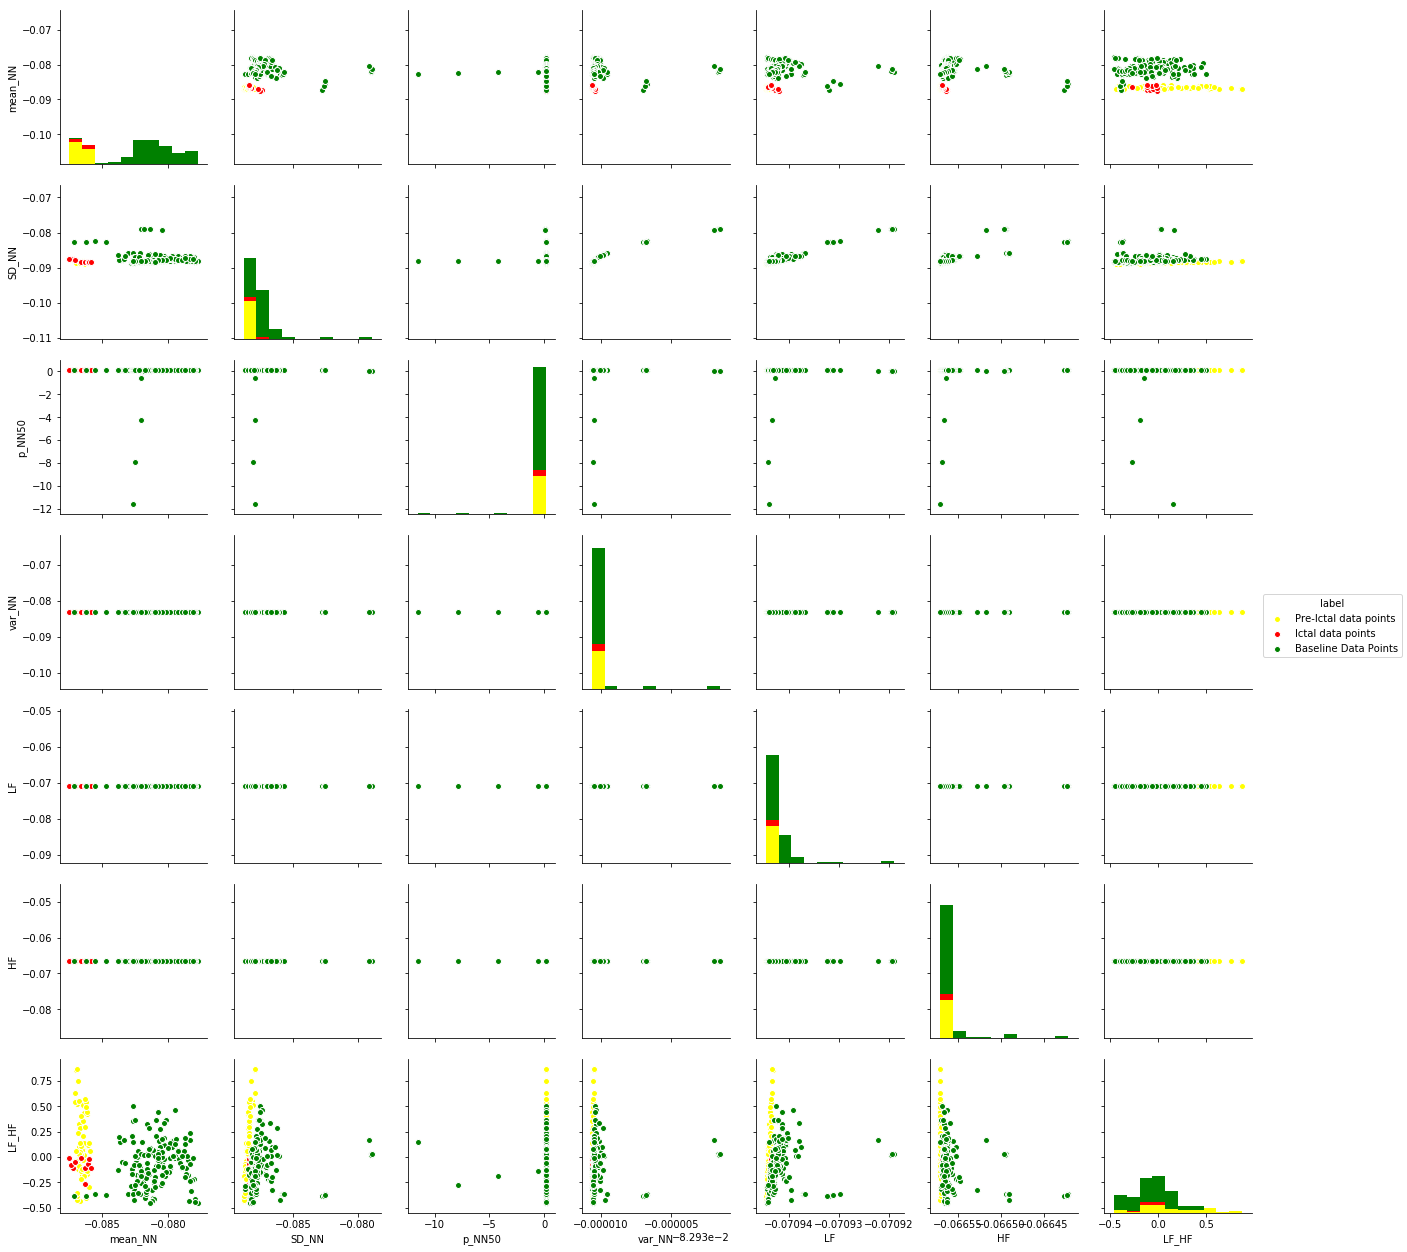

In [12]:

import classification.eda.hist as plt_hist
import classification.eda.andrews as plt_and
import classification.eda.series as plt_ts
import classification.eda.box as plt_box
import classification.eda.scatter as plt_sc
import matplotlib.pyplot as plt


    
if plot_eda_all_new:

    for data_patient_seizure in data_groups_list:

        if flag_hist:
            plt_hist.histogram(path_to_save,
                                    data_patient_seizure[1],
                                    data_patient_seizure[0],
                                    features,
                                    'time_sample',
                                    'patient_nr',
                                    'seizure_nr',
                                    'label',
                                    'color',
                                     bins=hist_bins,
                                     dist=dist)


        if flag_series:
            plt_ts.time_series_plot(path_to_save, data_patient_seizure[1],
                                    features,
                                    'time_sample',
                                    'patient_nr',
                                    'seizure_nr',
                                    'label',
                                    'color')
        if flag_andrews:
            plt_and.andrews_curves(path_to_save,
                                    data_patient_seizure[1],
                                    data_patient_seizure[0],
                                    features,
                                    'time_sample',
                                    'patient_nr',
                                    'seizure_nr',
                                    'label',
                                    'color')
        if flag_box:
            plt_box.box_plot(path_to_save,
                            data_patient_seizure[1],
                            data_patient_seizure[0],
                            features,
                            'time_sample',
                            'patient_nr',
                            'seizure_nr',
                            'label',
                            'color')

        if flag_pair:

            plt_sc.pair_plot(path_to_save,
                            data_patient_seizure[1],
                            data_patient_seizure[0],
                            features,
                            'time_sample',
                            'patient_nr',
                            'seizure_nr',
                            'label',
                            'color')
            
else:
    import os
    from IPython.display import Image
    a = [name for name in os.listdir(path_to_save) if name.endswith(".png")]
    for image in a:
        display(Image(filename=path_to_save + image))
    
    

In [13]:
import classification.cross_validation as cv

# ***********************************Learning****************************
# Learn from data_struct using nested cross_validation
# learninig is an optimization and respective test results
# for each partition of the dataset according to cv_out


# prepare data for classification - watch out for memory concerns
X = data[features]
y = data[label]
groups = data[group_id]

learning_results = cv.nested_cross_validation(path_to_save,
                                       X,y, groups,
                                       pipe,
                                       param_grid, scoring,
                                       compute_all_new, cv_out, cv_in,
                                       search_function)
#************************************************************************
groups = data_groups.groups.keys()

for learning_result, group in zip(learning_results, groups):
        learning_result['group'] = group
        
cv_object = learning_results

cv.generate_classification_report(cv_object)



Fitting 2 folds for each of 256 candidates, totalling 512 fits


/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done 512 out of 512 | elapsed:    4.1s finished
classification/cross_validation.py:58: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block2_values] [items->['param_SVC__C', 'param_SVC__gamma', 'params']]

  for i, (train, test) in enumerate(cv_out)]


ready to return optimization objects
/mnt/pre_epi_seizures/EDAnalysis/0f8a2966-3df5-11e8-932f-b06ebfc25cc2/0f8a2967-3df5-11e8-932f-b06ebfc25cc2hp_opt_results__0.h5
Trying to save file
..Succes in opening the object

these are the results in a dataframe
     mean_fit_time  mean_score_time  mean_test_accuracy  mean_test_f1_macro  \
0         0.001811         0.002776            0.701754            0.274914   
1         0.001782         0.002447            0.701754            0.274914   
2         0.001693         0.002256            0.701754            0.274914   
3         0.001845         0.002380            0.701754            0.274914   
4         0.001740         0.002380            0.701754            0.274914   
5         0.001722         0.002408            0.701754            0.274914   
6         0.001742         0.002324            0.701754            0.274914   
7         0.001729         0.002376            0.701754            0.274914   
8         0.001849         0.002349 

[Parallel(n_jobs=1)]: Done 512 out of 512 | elapsed:    4.1s finished


ready to return optimization objects
/mnt/pre_epi_seizures/EDAnalysis/0f8a2966-3df5-11e8-932f-b06ebfc25cc2/0f8a2967-3df5-11e8-932f-b06ebfc25cc2hp_opt_results__1.h5
Trying to save file
..Succes in opening the object

these are the results in a dataframe
     mean_fit_time  mean_score_time  mean_test_accuracy  mean_test_f1_macro  \
0         0.001772         0.002199            0.701754            0.274914   
1         0.001612         0.002168            0.701754            0.274914   
2         0.001605         0.002174            0.701754            0.274914   
3         0.001620         0.002165            0.701754            0.274914   
4         0.001623         0.002186            0.701754            0.274914   
5         0.001607         0.002187            0.701754            0.274914   
6         0.001622         0.002177            0.701754            0.274914   
7         0.001604         0.002362            0.701754            0.274914   
8         0.001615         0.002200 

[Parallel(n_jobs=1)]: Done 512 out of 512 | elapsed:    4.1s finished
/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ready to return optimization objects
/mnt/pre_epi_seizures/EDAnalysis/0f8a2966-3df5-11e8-932f-b06ebfc25cc2/0f8a2967-3df5-11e8-932f-b06ebfc25cc2hp_opt_results__2.h5
Trying to save file
..Succes in opening the object

these are the results in a dataframe
     mean_fit_time  mean_score_time  mean_test_accuracy  mean_test_f1_macro  \
0         0.001793         0.002257            0.701754            0.274914   
1         0.001610         0.002176            0.701754            0.274914   
2         0.001607         0.002172            0.701754            0.274914   
3         0.001775         0.002190            0.701754            0.274914   
4         0.001604         0.002170            0.701754            0.274914   
5         0.001609         0.002173            0.701754            0.274914   
6         0.001622         0.002172            0.701754            0.274914   
7         0.001601         0.002186            0.701754            0.274914   
8         0.001773         0.002204 

precision  \
Model                                              Best Parameters                   Test Group                                         Labels                             
Pipeline(memory=None,\n     steps=[('SVC', SVC(... {'SVC__gamma': 1, 'SVC__C': 1024} ('3', '2', 'Focal Onset - Aware - Non-Motor', '... Baseline Data Points      0.7339   
                                                                                                                                        Ictal data points         0.0000   
                                                                                                                                        Pre-Ictal data points     0.0000   
                                                                                                                                        avg / total               0.5150   
                                                                                     ('3', '0', 'Focal Onset - Secondary Generalized... Baseline Data Points      0.7635   
                                                                                                                                        Ictal data points         0.0000   
                                                                                                                                        Pre-Ictal data points     0.6364   
                                                                                                                                        avg / total               0.6977   
                                                                                     ('3', '1', 'Focal Onset - Not Aware - Motor', '... Baseline Data Points      0.7111   
                                                                                                                                        Ictal data points         0.0000   
                                                                                                                                        Pre-Ictal data points     1.0000   
                                                                                                                                        avg / total               0.7534   

                                                                                                                                                               recall  \
Model                                              Best Parameters                   Test Group                                         Labels                          
Pipeline(memory=None,\n     steps=[('SVC', SVC(... {'SVC__gamma': 1, 'SVC__C': 1024} ('3', '2', 'Focal Onset - Aware - Non-Motor', '... Baseline Data Points   1.0000   
                                                                                                                                        Ictal data points      0.0000   
                                                                                                                                        Pre-Ictal data points  0.0000   
                                                                                                                                        avg / total            0.7018   
                                                                                     ('3', '0', 'Focal Onset - Secondary Generalized... Baseline Data Points   0.9688   
                                                                                                                                        Ictal data points      0.0000   
                                                                                                                                        Pre-Ictal data points  0.2414   
                                                                                                                                        avg / total            0.7412   
                                                            

In [14]:
import seaborn as sns
import itertools

if hyper_param_heat:
    for clf, test in learning_results:
        print clf.best_estimator_
        cv_results = clf.cv_results_
        keys = cv_results.keys()

        for grid in param_grid:
            estimator_params = [key 
                                for key in grid.keys()
                                if 'estimator' in key]
            print estimator_params
            param_bi_comb = itertools.combinations(estimator_params, r=2)

            for bi_comb in param_bi_comb:

                for key in keys:

                    if 'param' not in key and 'rank' not in key:
                        metric = cv_results[key]
                        df = metric.reshape(len([2**i for i in xrange(-5, 11)]), len([2**i for i in xrange(-15, 1)]))

                        #df = pd.DataFrame(df, columns=[str(2**i) for i in xrange(-15, 1)])
                        #df['ix'] = [str(2**i) for i in xrange(-5, 11)]
                        #df.set_index('ix')

                        plt.figure()
                        sns.heatmap(df,
                                    xticklabels=[2**i for i in xrange(-5, 11)],
                                    yticklabels=[2**i for i in xrange(-15, 1)],
                                    cbar_kws={'label': key},
                                   )
                        plt.title(key)
                        plt.xlabel(bi_comb[0])
                        plt.ylabel(bi_comb[1])
                        #plt.savefig(path_to_save + '/' + key)
                        plt.show()
                        
hyper_param_list=False                        
if hyper_param_list:
    for learning_result in learning_results:

        cv_results = learning_result['cv_results']
        keys = list(cv_results.keys())
        print keys
        
        for grid in param_grid:
            params = grid.keys()
            print params
            for param in params:
                
                key_param_variation = keys[keys.index('param_' + param)]
                param_variation = cv_results[key_param_variation]
                
                print param_variation
                stop
                
                

        

In [15]:
from classification.cross_validation import *

In [16]:
report = generate_classification_report(cv_object)
report.to_hdf(path_to_save + 'classification_resport.h5', '/report' )

pd.read_hdf(path_to_save + 'classification_resport.h5', '/report' )

/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/pandas/io/pytables.py:280: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->axis0] [items->None]

  f(store)
/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/pandas/io/pytables.py:274: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->axis1_level3] [items->None]

  f = lambda store: store.put(key, value, **kwargs)
/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/pandas/io/pytables.py:280: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->block0_items] [items->None]

  f(store)


precision  \
Model                                              Best Parameters                   Test Group                                         Labels                             
Pipeline(memory=None,\n     steps=[('SVC', SVC(... {'SVC__gamma': 1, 'SVC__C': 1024} ('3', '2', 'Focal Onset - Aware - Non-Motor', '... Baseline Data Points      0.7339   
                                                                                                                                        Ictal data points         0.0000   
                                                                                                                                        Pre-Ictal data points     0.0000   
                                                                                                                                        avg / total               0.5150   
                                                                                     ('3', '0', 'Focal Onset - Secondary Generalized... Baseline Data Points      0.7635   
                                                                                                                                        Ictal data points         0.0000   
                                                                                                                                        Pre-Ictal data points     0.6364   
                                                                                                                                        avg / total               0.6977   
                                                                                     ('3', '1', 'Focal Onset - Not Aware - Motor', '... Baseline Data Points      0.7111   
                                                                                                                                        Ictal data points         0.0000   
                                                                                                                                        Pre-Ictal data points     1.0000   
                                                                                                                                        avg / total               0.7534   

                                                                                                                                                               recall  \
Model                                              Best Parameters                   Test Group                                         Labels                          
Pipeline(memory=None,\n     steps=[('SVC', SVC(... {'SVC__gamma': 1, 'SVC__C': 1024} ('3', '2', 'Focal Onset - Aware - Non-Motor', '... Baseline Data Points   1.0000   
                                                                                                                                        Ictal data points      0.0000   
                                                                                                                                        Pre-Ictal data points  0.0000   
                                                                                                                                        avg / total            0.7018   
                                                                                     ('3', '0', 'Focal Onset - Secondary Generalized... Baseline Data Points   0.9688   
                                                                                                                                        Ictal data points      0.0000   
                                                                                                                                        Pre-Ictal data points  0.2414   
                                                                                                                                        avg / total            0.7412   
                                                            

In [17]:
string = report.to_latex()
print string.replace('\_', " ")

\begin{tabular}{llllrrrr}
\toprule
                                                                                                                                                                                                                                                                              &                                   &                                                                                                            &                      &  precision &  recall &  f1-score &  support \\
Model & Best Parameters & Test Group & Labels &            &         &           &          \\
\midrule
Pipeline(memory=None,\textbackslashn     steps=[('SVC', SVC(C=1024, cache size=200, class weight=None, coef0=0.0,\textbackslashn  decision function shape='ovr', degree=3, gamma=1, kernel='rbf',\textbackslashn  max iter=-1, probability=False, random state=None, shrinking=True,\textbackslashn  tol=0.001, verbose=False))]) & \{'SVC  gamma': 1, 'SVC  C': 1024\} & ('3', '2', '

In [18]:
import numpy as np
import pandas as pd
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
s = pd.DataFrame(np.random.randn(8, 4), index=arrays)
s


0         1         2         3
bar one -0.337625  0.544917 -0.001828 -0.762855
    two  1.284388  1.260392  0.095009 -1.029725
baz one  1.019750 -0.889468  1.387653  0.163857
    two  0.029830 -0.451647  1.587233  0.243405
foo one -1.059884 -0.216824  1.050347 -0.606463
    two -1.017398  0.231440  0.718970  0.650318
qux one  0.027908 -1.296385 -1.542017  0.504822
    two  0.548875 -0.326610  0.084642 -0.912315

In [19]:
print s.to_latex()

\begin{tabular}{llrrrr}
\toprule
    &     &         0 &         1 &         2 &         3 \\
\midrule
bar & one & -0.337625 &  0.544917 & -0.001828 & -0.762855 \\
    & two &  1.284388 &  1.260392 &  0.095009 & -1.029725 \\
baz & one &  1.019750 & -0.889468 &  1.387653 &  0.163857 \\
    & two &  0.029830 & -0.451647 &  1.587233 &  0.243405 \\
foo & one & -1.059884 & -0.216824 &  1.050347 & -0.606463 \\
    & two & -1.017398 &  0.231440 &  0.718970 &  0.650318 \\
qux & one &  0.027908 & -1.296385 & -1.542017 &  0.504822 \\
    & two &  0.548875 & -0.326610 &  0.084642 & -0.912315 \\
\bottomrule
\end{tabular}



In [20]:
del classification_report

In [21]:
best_params

NameError: name 'best_params' is not defined

In [ ]:
learning_results